In [ ]:
import pandas as pd
import numpy as np
import string
import re
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import word2vec, FastText
import gensim.downloader
from sklearn.decomposition import PCA

#device = torch.device('cude' if torch.cuda.is_available() else "cpu")



`You are a data scientists in Amazon Alexa`.
- Amazon wants to increase its footprints and sell of alexa in European Market.
- it  wants to add translator feature to Alexa.
- Teams wants to translate any english sentence to French
- They wanted you to train Machine learning model, which translate english to french.




## How Machine Learning understand Language Translation Problem?

In Machine Learning terminology, Language Translation is a kind of Seq2seq Learning Algorithm

# What is Seq2seq Learning Algorithms

 

 .
*   where, input and output is a set of sequence like words,  & characters.

*   It transforms an input sequence to an output sequence.
*   Ex -> language translation, speech recognition, text-to-speech transformation, etc.


*   Mathematically, Input text sequence of symbol representations (x1, …, xn) is mapped to a sequence of representations y= (y1, …, ym), where m=~n





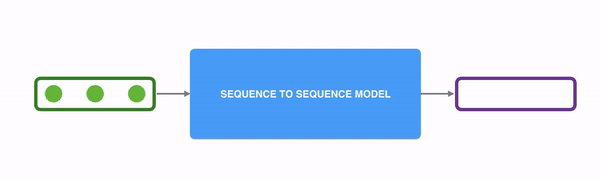

## What are different types of the se2seq Algorithm used for Language translation?

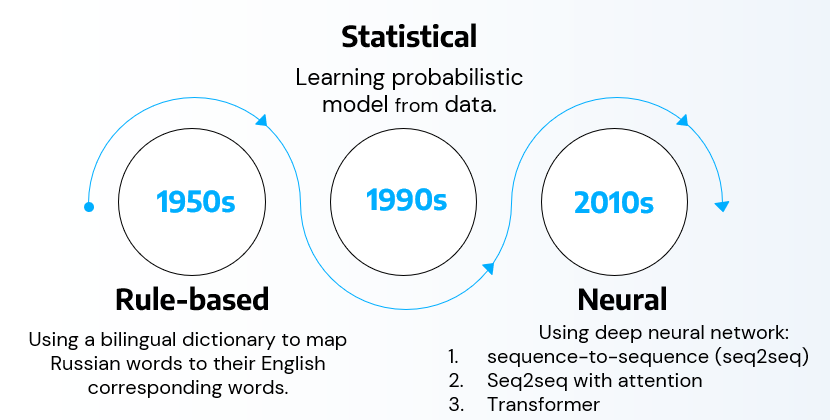

So, what are the different types of algorithm/architecture used for Language Translation?



*   Rule-based Machine Translation or RBMT
*   Statistical Machine Translation or SMT
*   Neural Machine Translation or NMT


## Rule-based Machine Translation or RBMT


*   Bilingual dictionary -> Mapping of source word to target word
*   A set of basic linguistic rules for each language -> like word is  singular/plural.


### How it works: 
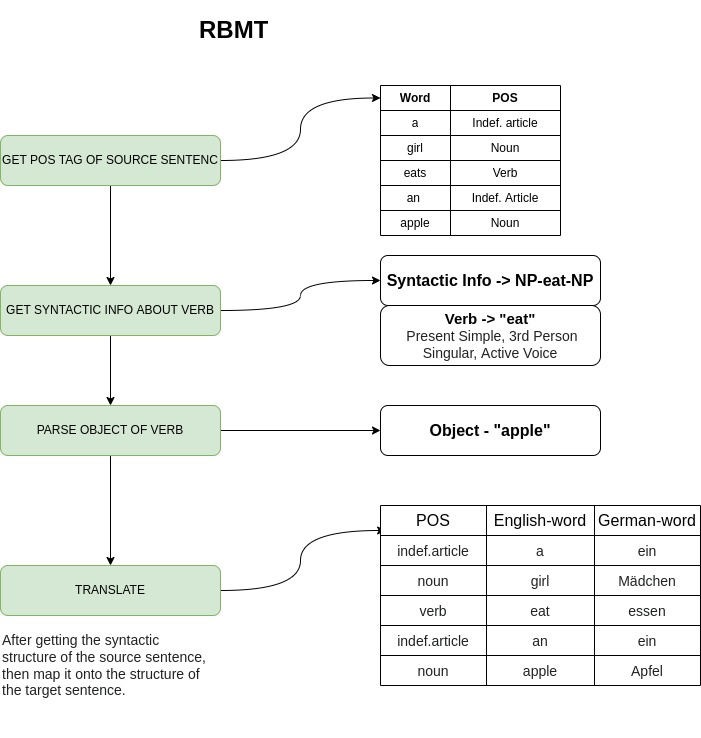


*  Dictionary for the source language is used to select input words in the target language. 
*  Syntax and grammar rules of both the source and target locale are observed,
*  Words taken from the dictionary are adapted appropriately (gender, grammatical number, word order etc).

### Disadvantage



*   Manual dictionary creation for each language pair.
*   Mannual linguistic rule creations .
*   The more the rules the harder to deal with the system.



### RBMT Example
- SYSTRAN was used for the Apollo-Soyuz project (1973) and by the Europian Commission (1975). It was used by Google’s language tools until 2007
- Apertium is open-source RBMT software.

# Statistical Machine Translation (SMT)


*   Train Statistical model from courpus.
*   Sentence is devided into small units of words and phrases.
*   Statistical Models learn how a specific source word is translated into different word in target language.
*   Models give more weightage to the source-target pair which comes maximum times in corpus.

### How it works: 
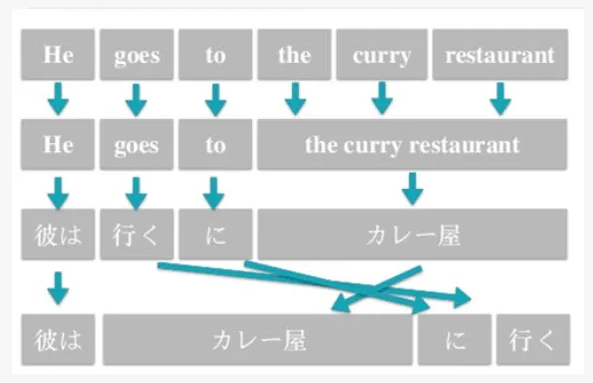

- Corpus is created which contains very large data set of approved previous translations.

-  Translation Model(TM) is build using the frequency of phrases appearing the training corpus
-  TM is nothing but a kind of table, also known as Phrase Table. 
- Table stores the phrase and the number of times this repeats over the entirety of the corpus. 
- more frequently a phrase is repeated in a training corpus, the more probable the target translation is correct.
- A Language Model is build which helps to determine the correct order of  phrases.

*  SMT requires two steps: 
      1. break sentences into phrases
      2. Language Model (what is the correct word given its context?/right order of words) 
      3. Translation Model (what is the best translation of a given word?)


### Disadvantage



*   Requires good bilingual corpus
*   Not an end-2-end single algorithm.
*   Less suitable for language pairs with big differences in word order

### SMT examples
- Google Translate (between 2006 and 2016, when they announced to change to NMT)
- Microsoft Translator (in 2016 changed to NMT)


# Neural Machine Translation or NMT

*  Train Neural network model
*  Encoder-Decoder architecture is used.

### How it works?

*  Imagine I’m trying to describe my dog — average size, sharp nose, short tail, always barks. 
*  If I gave you this set of the dog’s features, and if the description was precise, 
*   **Could you draw it?, even though you have never seen it. -> Yes!!** 

**Similarly in NMT,**

*   Get feature of source Sequence
*   Use source feature to generate the output.

So,

1.  The very first step is a kind of encoding steps 
2.  And the architecture block which do encoding are called as Encoder.
3.  Second step is a kind of decoding steps.
4.  And the architecture block which do decoding are called as Decoder. 

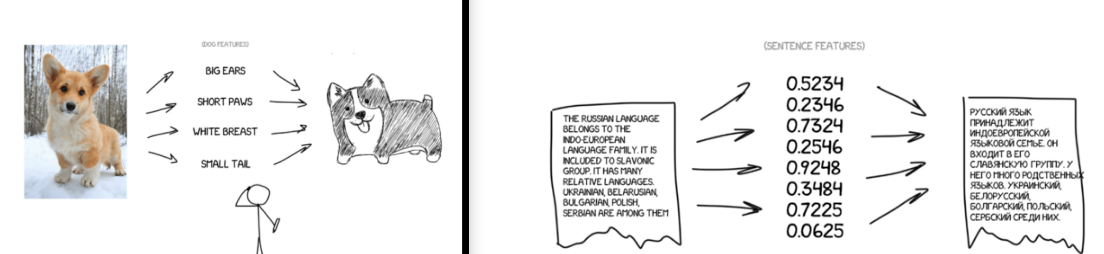

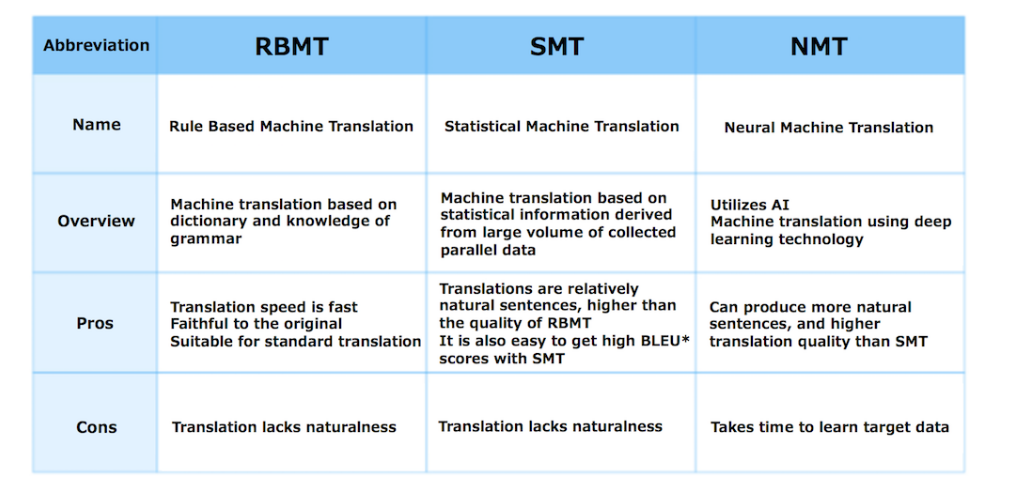

#  So which Algorithm we should use for our task?



*   From the figure, NMT has goods translation quality score
*   So, We will be studying NMT in details.



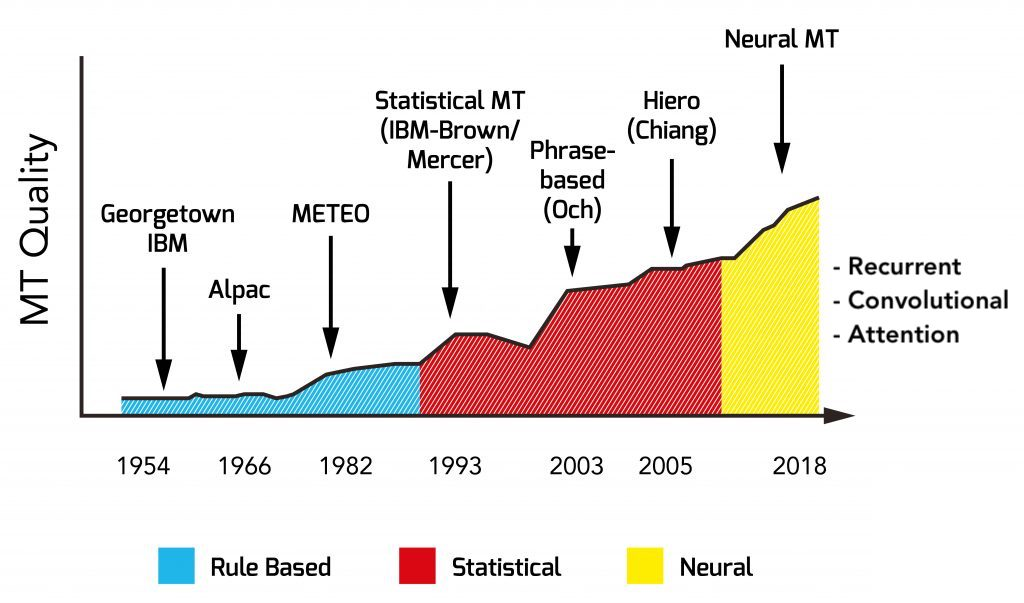

# Neural Machine Translation NMT



*   As already explained, Encoder-Decoder Architevture is used.
*   Based on architecture variations, NMT can be furthur categorised into:
        1.  RNN\LSTM\GRU Based NMT
        2.  RNN\LSTM\GRU with attention mechanisms Based NMT
        3.  Attention mechanisms\Transformers based NMT



# What is Encoder-Decoder Architecture? 

## Encoder-Decoder Architecture

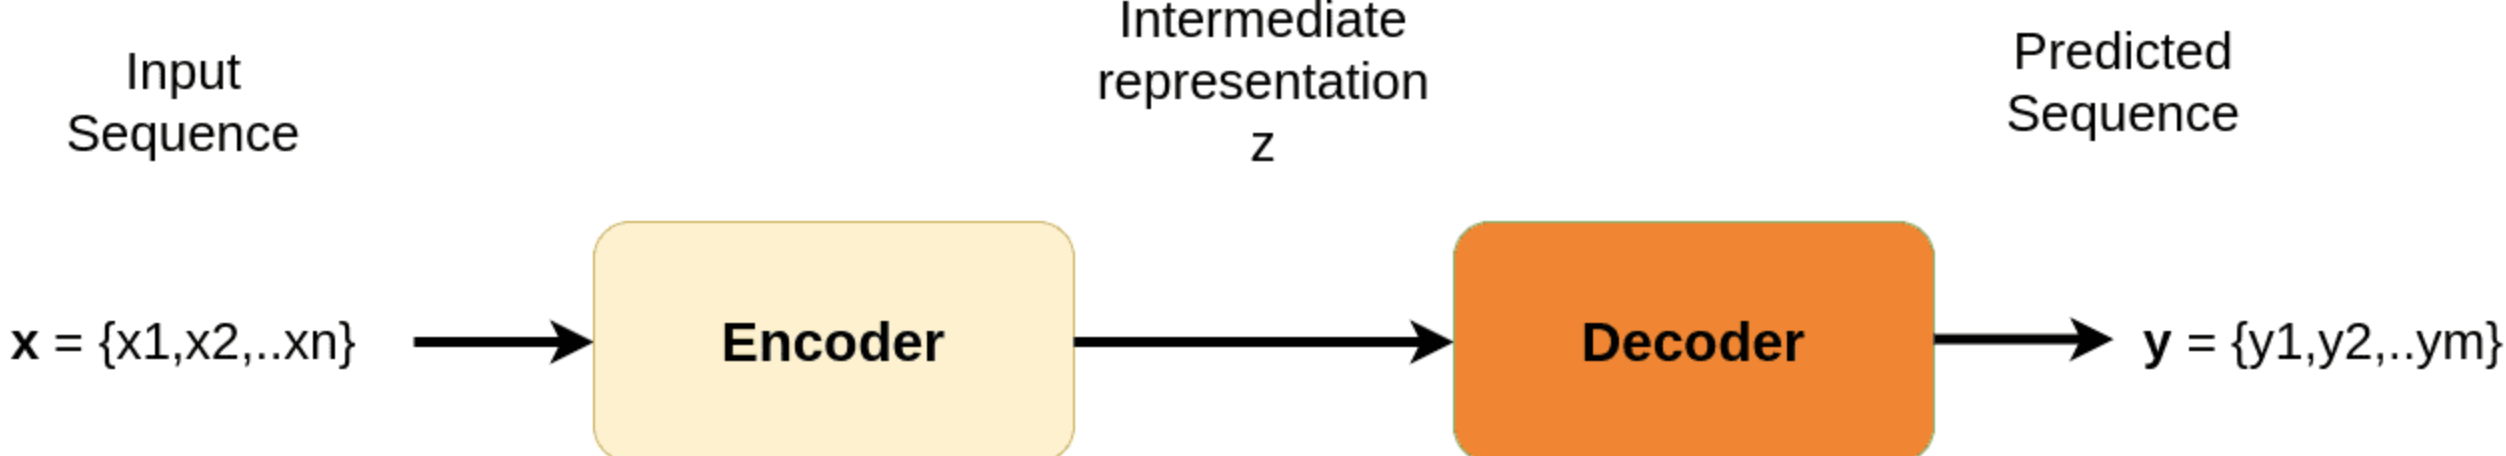

Consist of:

*   Encoder Component
*   Encoder Vector/Hidden State Vector/Context Vector
*   Decoder Component




## Encoder



*   Encoder is just Stack of RNN Layers
*   Encoder reads and encodes your text to a numerical representation



## Encoder Vector/Hidden State Vector/Context Vector



*   It is nothing but final hidden state vector produced from the RNN of the encoder and act as input to Decoder
*   This vector aims to encapsulate the information for all input elements.




## Decoder



*   Also Stack of RNN Layers.
*   Autoregressive Architecture, generate output at each decoder timestamp.
*   Each recurrent unit accepts its previous hidden state vector and Encoded Vectors, and produces output vector as well as its own hidden state vector. 
-  Output Vector is then pass through softmax layer to predict output sequence.



# 1. RNN\LSTM\GRU Based NMT

### How translation is done using Encoder-Decoder having RNN\LSTM\GRU?

- Vocabulary is created by assigning unique index to each input text sequence.
- Input text sequence is converted to vector representation
- popular word embeddings like Word2Vec, Glove, Fasttext etc are used.

* **Encoder** receives `encoder input data` and 
  * process it
  * outputs its ***last hidden state + last cell state*** as the **context vector**
  * transfers this **context vector** to the decoder 

* **Decoder**:
 * Decoder's **initial states** hidden state are  the context vector sent by the encoder
  * Decoder's **initial input** is  a special symbol such as '**START**' 

  Then, Decoder *runs* **in a loop**. At each time step, Decoder:
  * consumes the **input** and **states**
  * **outputs** its 
    * **last hidden state**, 
    * **last hidden state (yes again!)**, 
    * **last cell state** 
  * uses last hidden state as **the next input** for itself
  * uses last hidden state + last cell state as **the next states** for itself 
  * uses last hidden state for the **prediction** for the current time step


*   The Encoder summarizes the input sequence into Encoded vectors
*   Decoder uses Encoded vectors and Generates output sequences using softmax




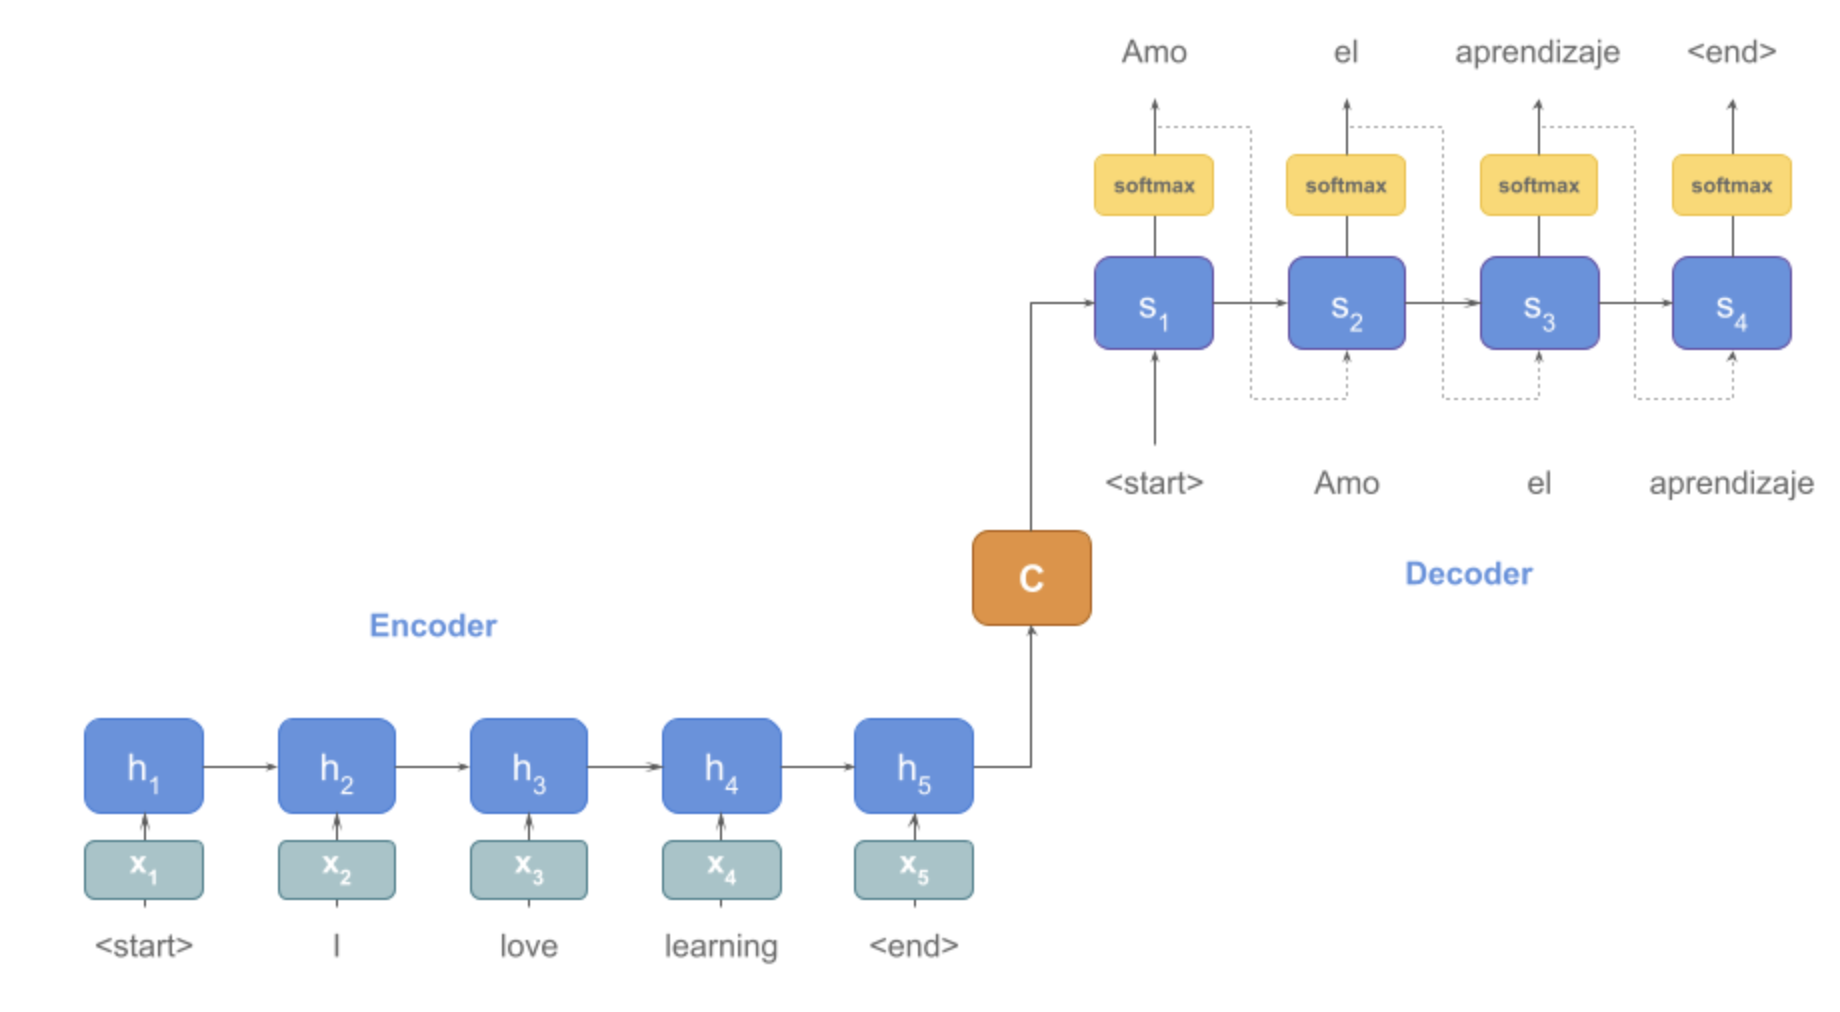

### Shall we use this architecture for your translation problem?

- Not everywhere but if your source sentence is very small and also source/target language is not morphically rich, you can use it for translation.
- Morphology is the study of the internal structure of words.. Morphology focuses on how the components within a word (stems, root words, prefixes, suffixes, etc.) are arranged or modified to create different meanings.
- Hindi is morphologically richer than english.


## What are the Problem with RNN\LSTM\GRU Based NMT?



### BottleNeck Problem




*   Encoded vector is incapable of remebering & Capturing whole information from the  long sentences
-   As the sequence length increases, RNN finds it very difficult to  learn the long range dependencies 
*   RNN faces Vanishing-Gradient problem as sentence length increases, that results in long-term dependencies being ignored during training. 

### Parallelisation
*  RNN are not hardware friendly. 
- Remember RNN and LSTM and derivatives use mainly sequential processing over time.


- Let me explain: it takes a lot of resources we do not have to train these network fast. Also it takes much resources to run these model in the cloud, and given that the demand for text translation is growing rapidly, the cloud is not scalable.



# 2. What change can we do to RNN/LSTM to over come the problems?

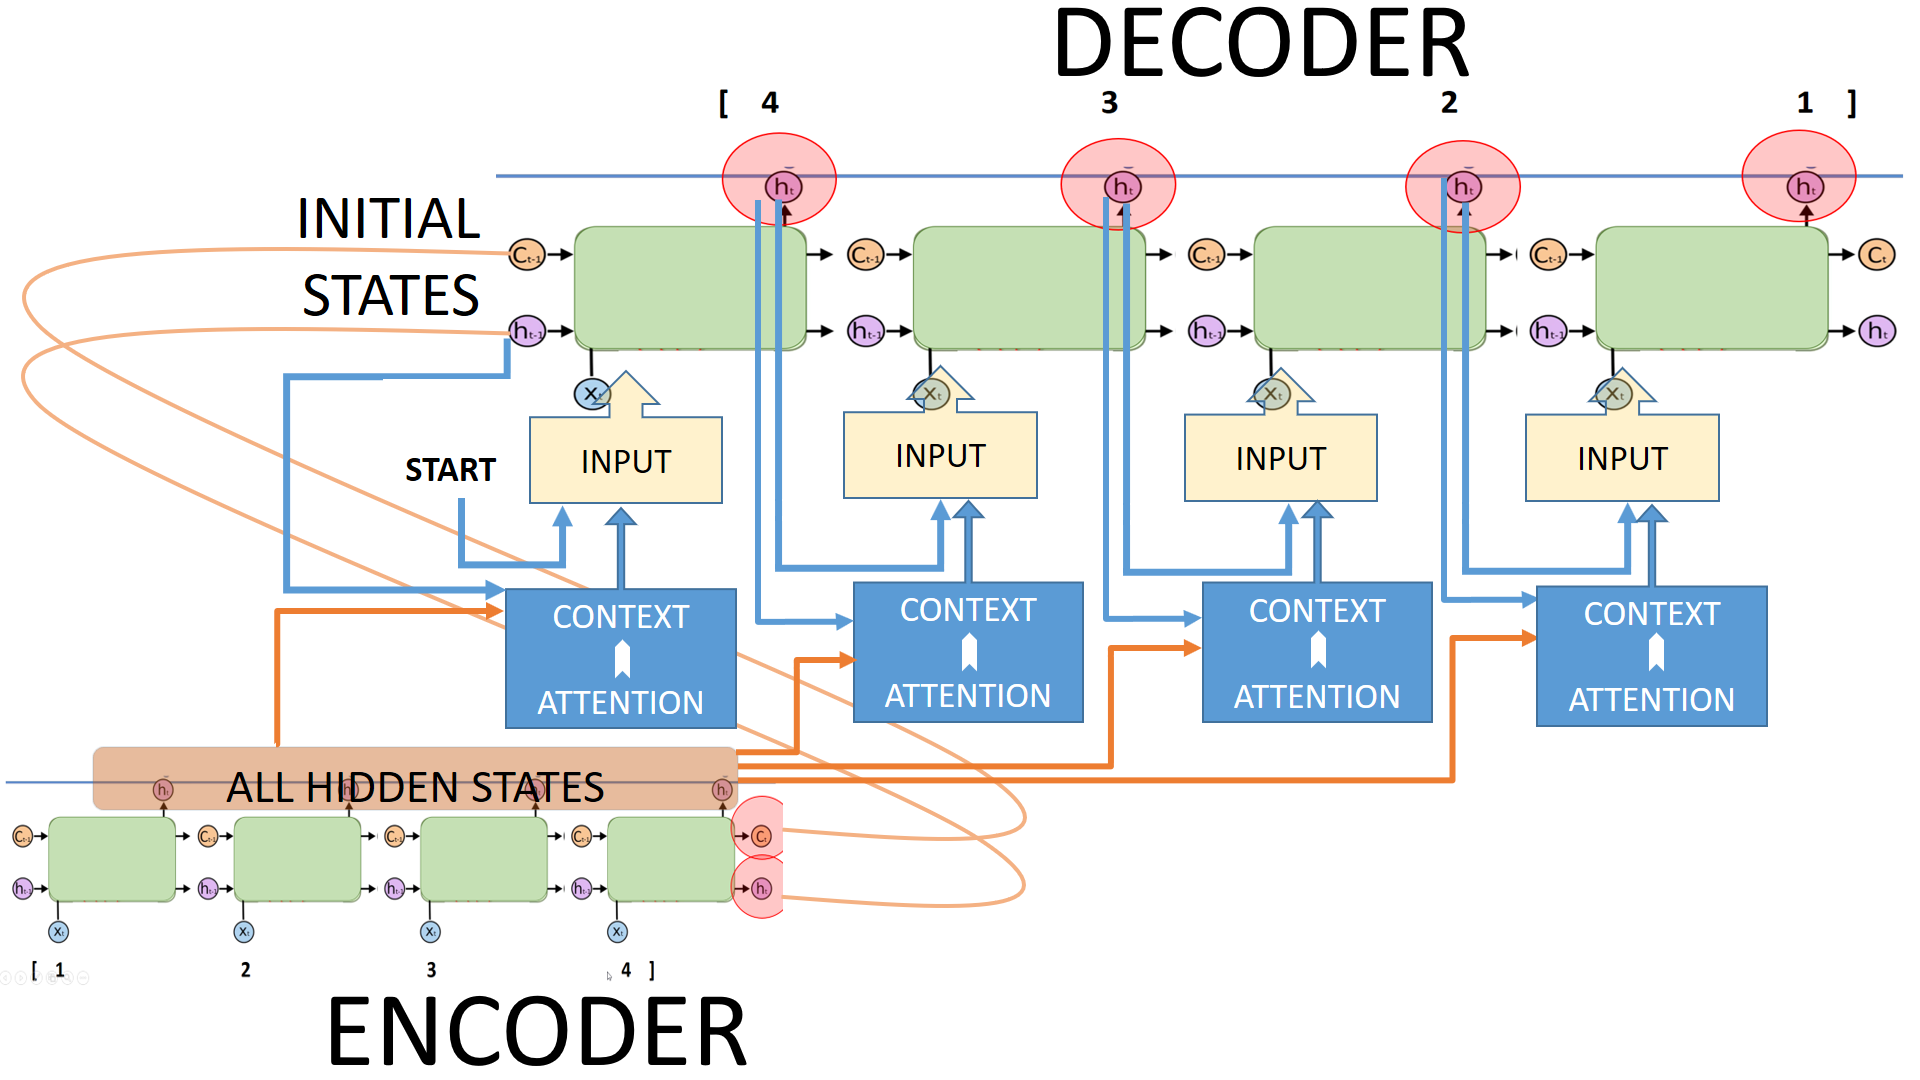










###  How it improve translation Quality?

- Attention Mechanisms

## What is Attention Mechanisms





>  " the action of taking special care of something." 



```
 The Attention Mechanism can be viewed as a method 
 for making the RNN work better by letting the network
  know where to look as it is performing its task.

```


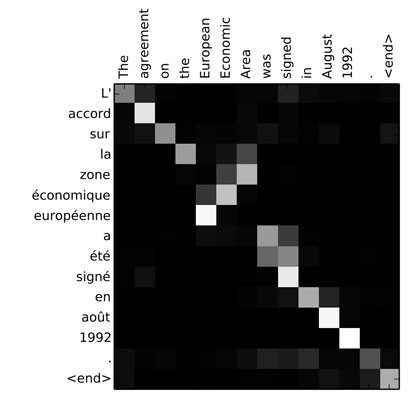


#### Let’s See our translation problems:

- Translating a sentence from English to French. As seen in the diagram, the white dots show where the network is “paying attention” as it tries to translate each word. Specifically, when it came up with the French word “européenne”, the network was looking at the English word “European”



- In a standard RNN without attention, the network would make a prediction merely based on the previous outputted words “L’ accord sur la zone économique” and the current word “Area”. But we don’t want the word “Area” since that word has already been translated. So attention says we have a higher probability of success if we look elsewhere.

Other way of looking attention as, 
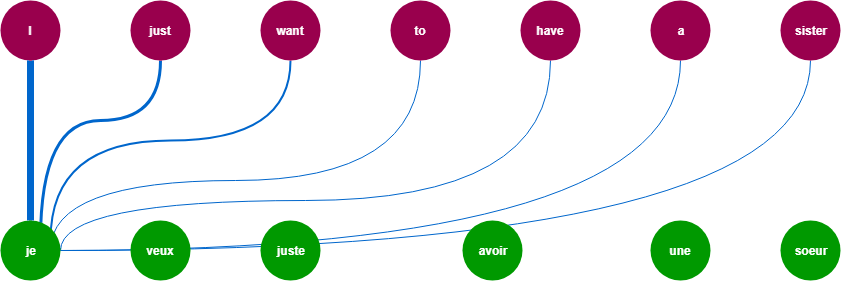

```

- thick arrows representss model is paying more attention to the given token
- Thicker the arrows, higher the attention weights.
```







- Attention mechanism tries to overcome the information bottleneck of the intermediary state.

- Attention is nothing but simply giving the model access to a memory.
-  In our case, memory is nothing but all the hidden states of the encoder. 
- The model chooses what to retrieve from this memory



*  IT concentrates on a few relevant things while ignoring others in deep neural networks.


*   In NMT, it looks at all the different input words & learn to “pay attention“ to the correct ones while translating.




## Why Attention Mechanisms in translation?

- It allows the decoder model to access all the hidden states, rather than a single vector (intermediary state vector, which is nothing but encoder’s last hidden state), while predicting each output.


*  RNN in Encoder-Vector has usually paid more attention to the last few sentences.
- Attention mechanisms creates a shortcut connection between the context vector and the entire source input.
*  Assign more weight to some input sequence which has an important contribution in prediction of output sequence.
*   Generate a Weighted-Encoder-vector which will be passed to decoder.

## What are the type of Attention mechanisms based used in translation?

- **1. With LSTM commonly:**

  - **Following Attention Mechanisms applied**

     - On the basis of abstraction -> single-head

    - On the basis of Input Sequence -> Distinctive attention

    - On the basis of representation -> single level

    - on the basis of position -> Global/soft

  - **Energy Function Used**

    *   Dot Product 

### Quick Compariosn between  RNN and RNN+Attention

Property|RNN/LSTM  |  RNN/LSTM+Attention
--------|-----------|------------------
opearations|sequential       |  sequential
context vector | last timestamp state  vector      | calculated using attention mechanisms
timestamp used | only last | all timestamp

## How translation is done in RNN\LSTM\GRU with Attention Mechanisms baesd NMT?


**Note that:**

* **In the Encoder-Decoder figure,**-> the Encoder-Decoder Model we have coded use 
  * **only** the decoder's **last** hidden and cell states
  * the decoder's states as an initial context vector  **only once** 


* **In the Encoder-Decoder-Attention figure**,-> the Encoder-Decoder model with the attention mechanism:
  * We use **not only** the last hidden and cell states **but also** the decoder's hidden states generated at **all the time steps**
  * We use all the decoder's hidden states at **all consecutive time steps** 
* Basically:
  * First, we initialize the Decoder states by using the last states of the Encoder as usual
  * Then at **each decoding time step**:
    * We use **Encoder's all hidden states** and **the previous Decoder's output** to calculate a **Context Vector** by applying ***an Attention Mechanism***
    * Lastly, we **concatenate** the **Context Vecto**r with **the previous Decoder's output** to create ***the input*** to the decoder.   

    



## Mathematical view of attention Meachanisms

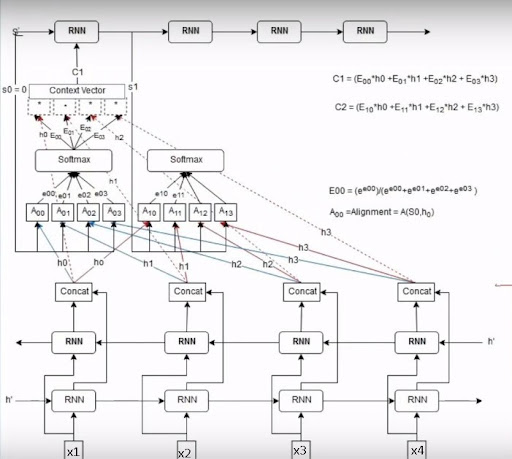

# So can we use this architecture for training our translation model?

Again, we can use this approach if your sentence length is not very large.It will give good results is sentence length is in (90-120)(approx).

-  First, It is very to inefficient stores all previous representation in memory/attention.
- Sequence at different positions has different effects on context vector, 
- Encoder RNN's last layers content has contribution from  all its previous layers.
- Although attention mechanims seems to collect lots of information,(by attending all input seq)
- but there is a very large overlap of information.
- Last few layers of RNN has more contribution in attention than first few layers.
- Architecture still lacking true independent impact of each sequence on attention weight calculation.
- Also Architecture still gives more importance to last few layers in context vector calculation.

**So we are able to resolve the Botleneck  problem upto some extent using attention, but RNN/LSTM still lacks in learning long-range dependencies, and also the structure of RNN/LSTM can't pe parallelized **

# 3.  Attention mechanisms\Transformers based NMT



## What is Transformers?


*   an Encoder-Decoder Architecture.
*   Neither Encoder nor Decoder contains RNN-like neural networks as basic components.
*   It only uses Attention mechanisms to both encode the sentence and decode the sentence.



*Property*|RNN/LSTM  |  RNN/LSTM+Attention | Transformers
--------|-----------|--------------|----
Recurrence blocks |Yes       |  Yes | No
Attention | No | Yes | Yes
context vector | last timestamp state  vector      | calculated using attention mechanisms| using attention mechanisms
attention alighment function| NA|Dot product| Scaled Dot Product
attention type | NA | single head | Multi head
operation | sequential|sequential|parallel

## What are Transformers Components?

Following are the components of Transformers:
1. Position Encodings
2. Transformers Encoders
3. Multi-headed Attention
4. Transformers Decoders
5. FFN




### As Transformer does not use recurrense layer like RNN/LSTM, how it understand the relative position of sequence in the inputs?

- Position and order of words are the essential parts of any language. They define the grammar and thus the actual semantics of a sentence. 
- Recurrent Neural Networks (RNNs) inherently take the order of word into account; They parse a sentence word by word in a sequential manner.

- One possible solution to give the model some sense of order is to add a piece of information to each word about its position in the sentence.

- positional encoding --> “piece of information”,  .

## How we can represents positions using position encoding? What are the approaches?
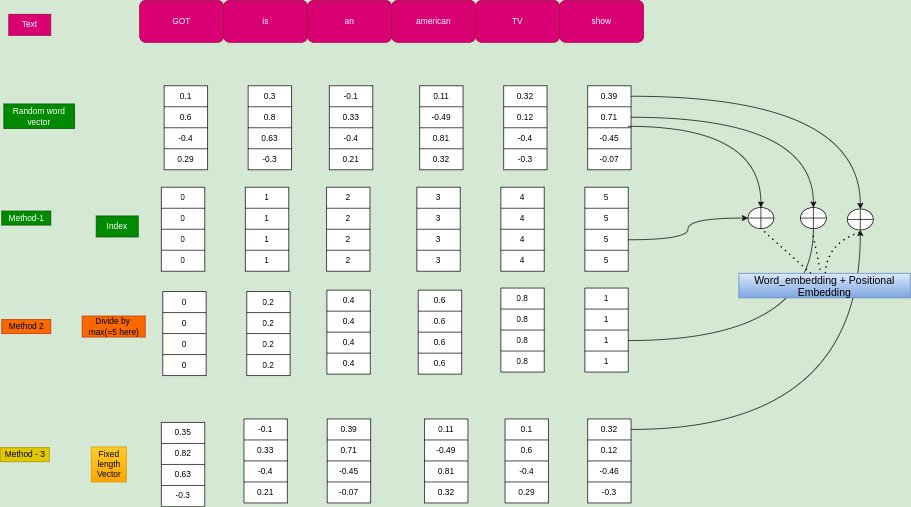

Lets see what are the methods we can use for positional embeddings.
 
Take the following example sentences
```
I love machine learning.
I am learning about transformers and attention models.
```
### Method-1: Absolute positional encoding
- just assign index to each sequence.
- as shown in above diagram

### Problem
- if sequence length increases, index value also increases.
- If you have a sequence of 500 tokens, you’ll end up with a 500 in our vector
- you know, neural nets like their weights to hover around zero, and usually be equally balanced positive and negative (-1,1)
- If not, you open yourself up to all sorts of problems, like exploding gradients and unstable training.

### Method-2 : Represent positions as a float between 0–1.


- PE for sentence 1 would be I-0.25, love-0.5, machine-0.75, learning-1.0.\
- PE for sentence 2 would be I-0.125, am-0.25, learning-0.375, about-0.5,  transformers-0.625,and-0.75,attention-0.875,models-1.0

### Problem
-  cannot handle arbitary sequence length as each of these entries is divided by the sequence length.
- A positional encoding value of say 0.8 means a totally different thing to a sequence of length 5 than it does for one of length 20. 
- For length 5, 0.8=4/5 meaning it would be the 4th element. For sequence length 20, 0.8=16/20 means 0.8 represents the 16th element!.


### Method -3 : Frequency Based fixed length vector(positional encoding)


- Sine and Cosine function is used. 
- Also, a sine function exists on [-1,1] so it’s also properly normalized,

- Position Embeddings is  a d-dimensional vector that contains information about a specific position in a sentence. 
- Length of each vector is equal to length of input embeddings vectors.
*   Each position/index is mapped to a vector


\begin{align}
        P(pos, 2i) = sin(\frac{pos}{n^(\frac{2i}{d})}).
    \end{align}


\begin{align}
        P(pos, 2i + 1) = cos(\frac{pos}{n^(\frac{2i}{d})}).
    \end{align}

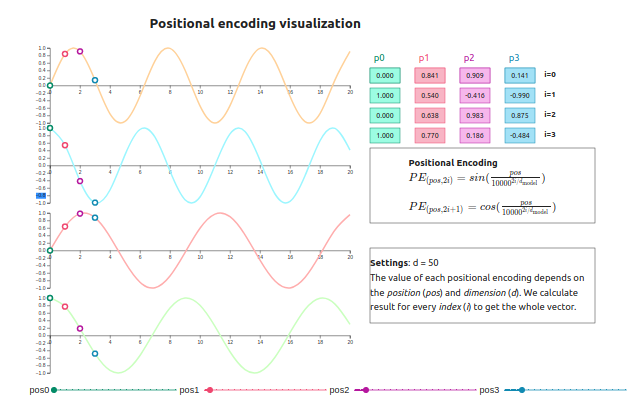


pos - position/index of sequence\
d- Embedding dimension\
n - User defined scalar. Set to 10,000\
i -  index of embedding dimensions


### How sine/cosine pairs represents positional embeddings:

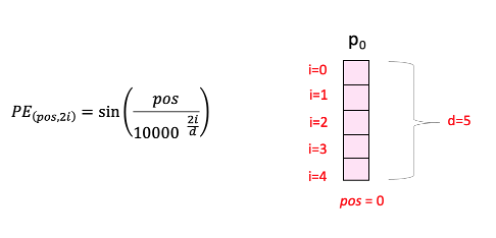
- Here “pos” refers to the position of the “word” in the sequence. 
- P0 refers to the position embedding of the first word;
- In this example d=5.
- “i” refers to each of the 5 individual dimensions of the embedding (i.e. 0, 1,2,3,4)

While “d” is fixed, “pos” and “i” vary.

 Let us try understanding the later two.

#### "pos"
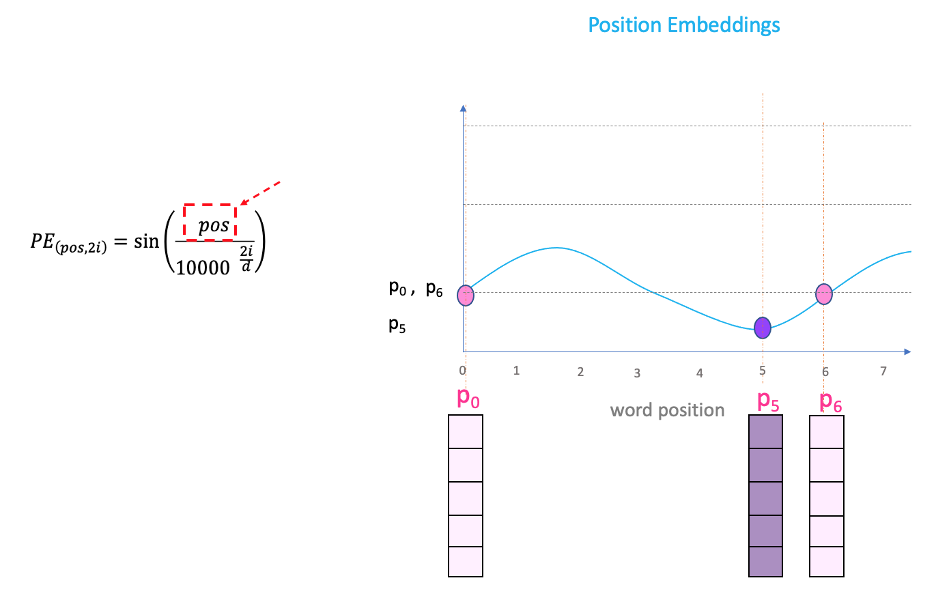

- After Ploting sine curve and vary "POS" on x-axis, we have different positional values on the y-axis.

-  so, words with different positions will have different position embeddings values.
- Problem --> As sine curve repeat in interval, we see P0 and P6 has same position embeddings

This is where the ‘i’ part in the equation comes into play.

#### "i"
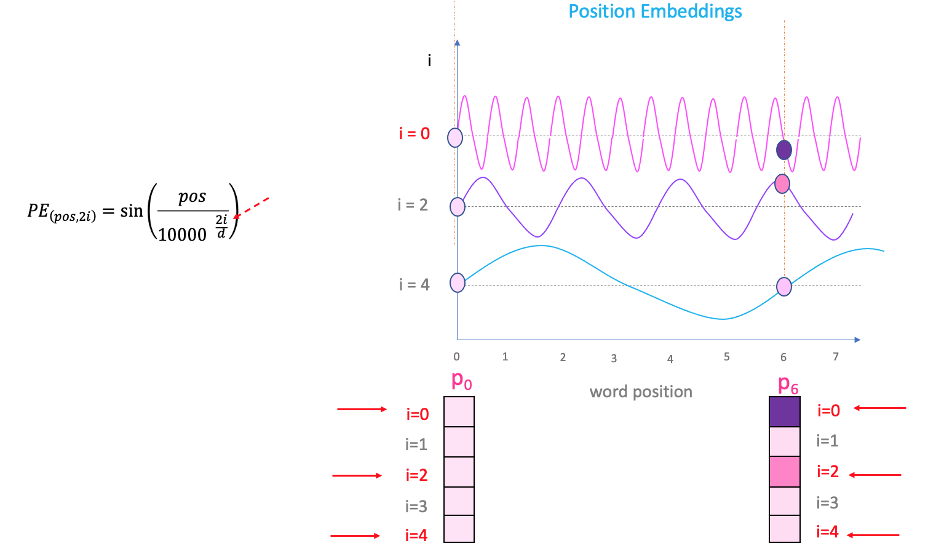

- If you vary “i” in the equation above, you will get a bunch of curves with varying frequencies.
- Reading off the position embedding values against different frequencies, lands up giving different values at different embedding dimensions for P0 and P6.








-



### Why use sin and cos both to represent positional encodings? How positional encoding understand relative positions? And how embdedding is independent of arbitary sequence length?

-  In trignometry,  we can express the sin(x+pos) and cos(x+pos) as a linear transformation of sin(x) and cos(x). 
- It seems that you can’t do the same thing with the single sine or cosine.

as, 

$ sin(x+pos) = sin(x)cos(pos) + cos(x)sin(pos)$

$ cos(x+k) =  cos(x)cos(pos) - sin(x)sin(pos)$

- sinusoidal waves display closeness in vector representation with respect to small changes in positions.
- In other words cosine_similarity between PE(pos) and PE(pos+1) will be greater than PE(pos) and PE(pos+10).
- They makes it easier to attend to relative positions because of their rotation property. 
- This means sin(w+k)/cos(w+k) can be represented as rotations of sin(w)/cos(w)
- This simply means PE(pos+k) = num_var * PE(pos) where num_var is independent of pos
- As you can see, vector representation does not depends on the size of sequence , as pos range from 0<=pos<=l/2



### How "d" effects posiiton embeddings?
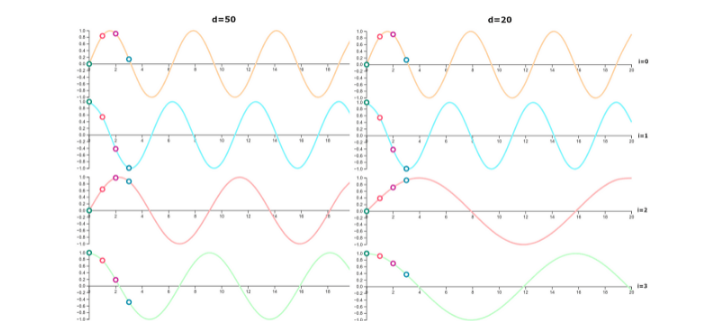

## Lets See how Positional encoding is calculated

Shape :  (100, 512)
First Sequence:  [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0

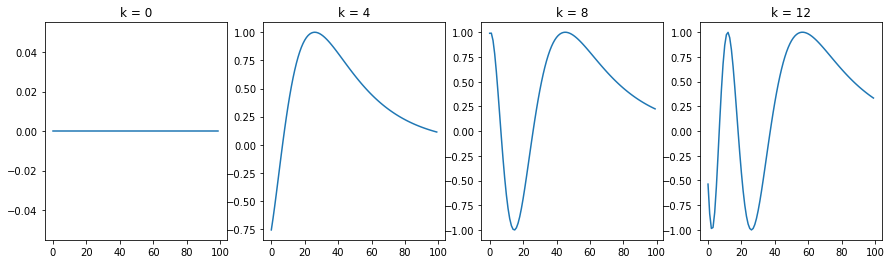

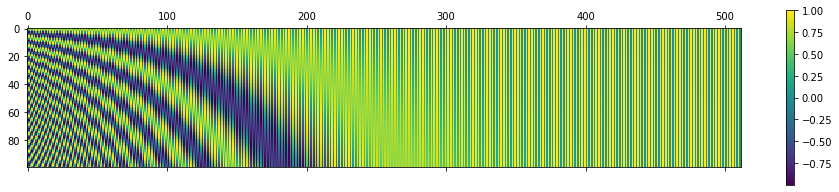

In [ ]:
def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
 
fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)
 

P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
print('Shape : ' , P.shape)
print('First Sequence: ', P[0])
print()
print('Second Sequence: ', P[1])

## How position encoding is used in Transformers?

- Input sequence is converted to input vector by mappping sequence with randomly initialized weight.
- Positional Encoding will have same length of input vector.
- Both input vector and position encoding vector is summed together.
- newly generated vector is used as final input vector to Transformers.

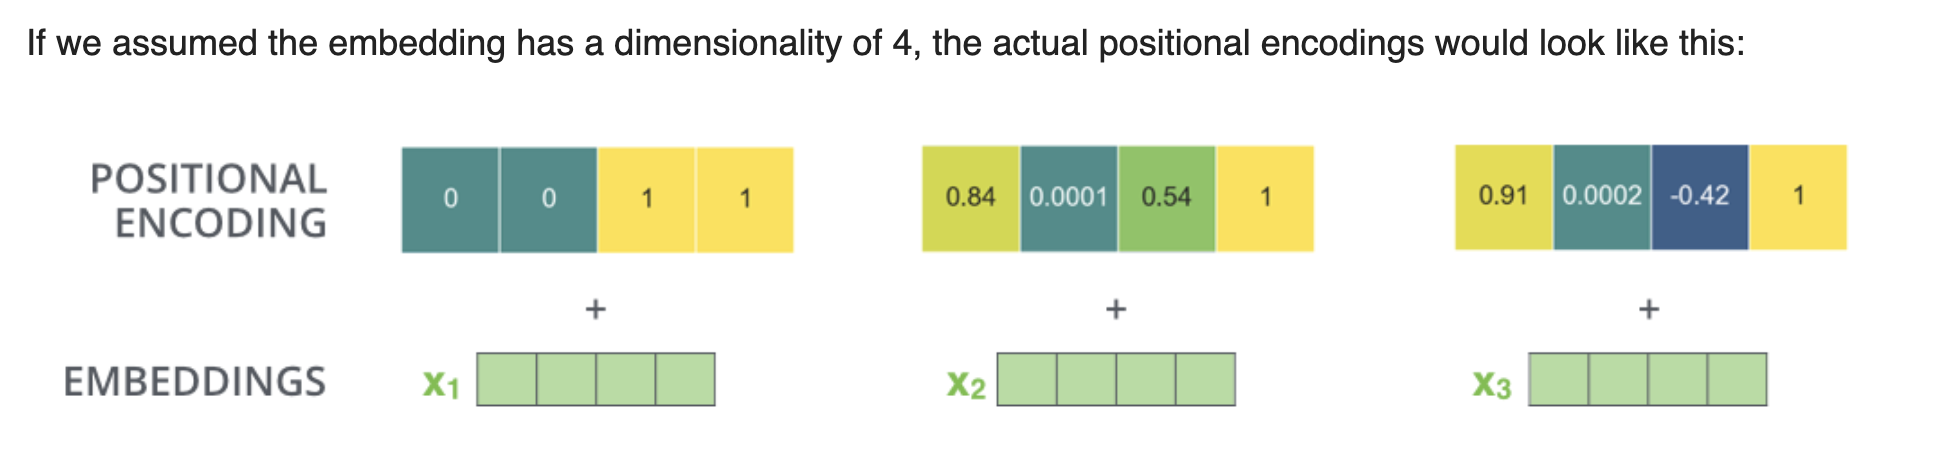

## How attention in transformers is different then attention mechanisms explained above.


- Instead of attention, self attention is used
*   Instead of uisng single head attention mechanisms, Transformers uses muilti-headed attention mechanisms.
*   Instead of DOT product, Scaled Dot product Score is used



## **What is self attention?**



- In Vanilla attention we take dot product of source sentence(encoder output) and target word(last decoder output)
- In Self Attention, we take the dot product of each token with itself and the rest of the tokens, we have an NxN matrix.

- Unlike Vanilla attention, Self attention in Transformer is trainable


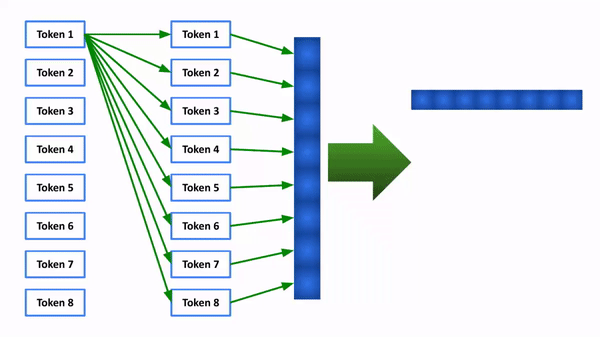

- take row-wise softmax of this matrix, 
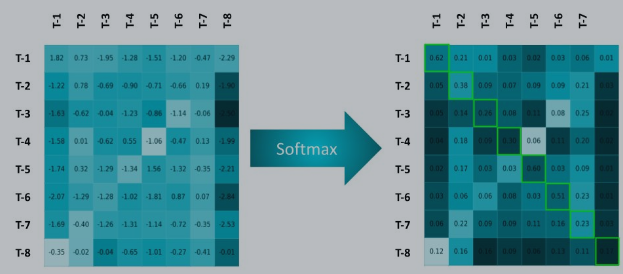
- resultant matrix has all values are between 0 and 1 (for each row)
- If we had 8 tokens,having embedding size of 512 each,  our input matrix is $8\times 512$

- self-attention matrix is $8\times 8$.
- multiply the original matrix by weight. Resulting matrix: 8x512 (same as original)
- Each embedding value is multiplied by the corresponding token’s weights
- Now, in the resulting matrix, we now have weighted embeddings.
- The weighted embeddings are “contextually influenced” and no longer depend only on the individual tokens.
- And this is how self-attention works!








### How Self-attention is trainable in transformers?

- If you see below picture, no weights parameter is involved in self-attention.
- But if we introduce some weight parameters, it helps to learn more pattern and also better representation.
- Transformers introduce 3 matrix Query, Key, Value Matrix, 
- and this 3 Matrix is shared across all the abstraction level of attention mechaisms like Multi-head settings
- Beacuse of this 3 matrix only , self-attention block becomes  trainable

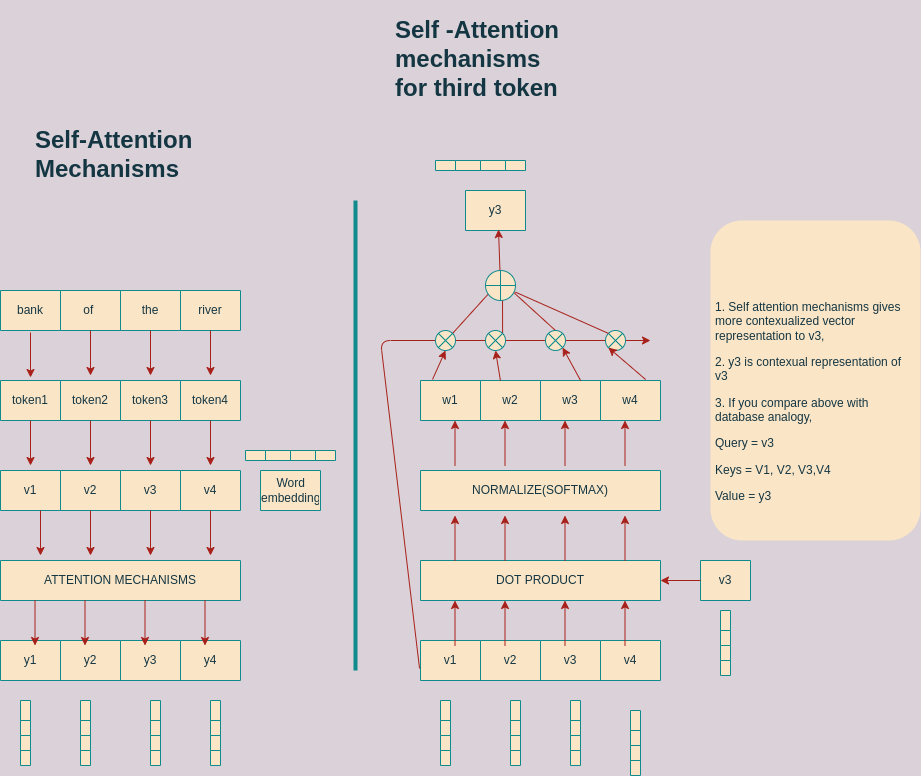

### Query, Key , Value ???
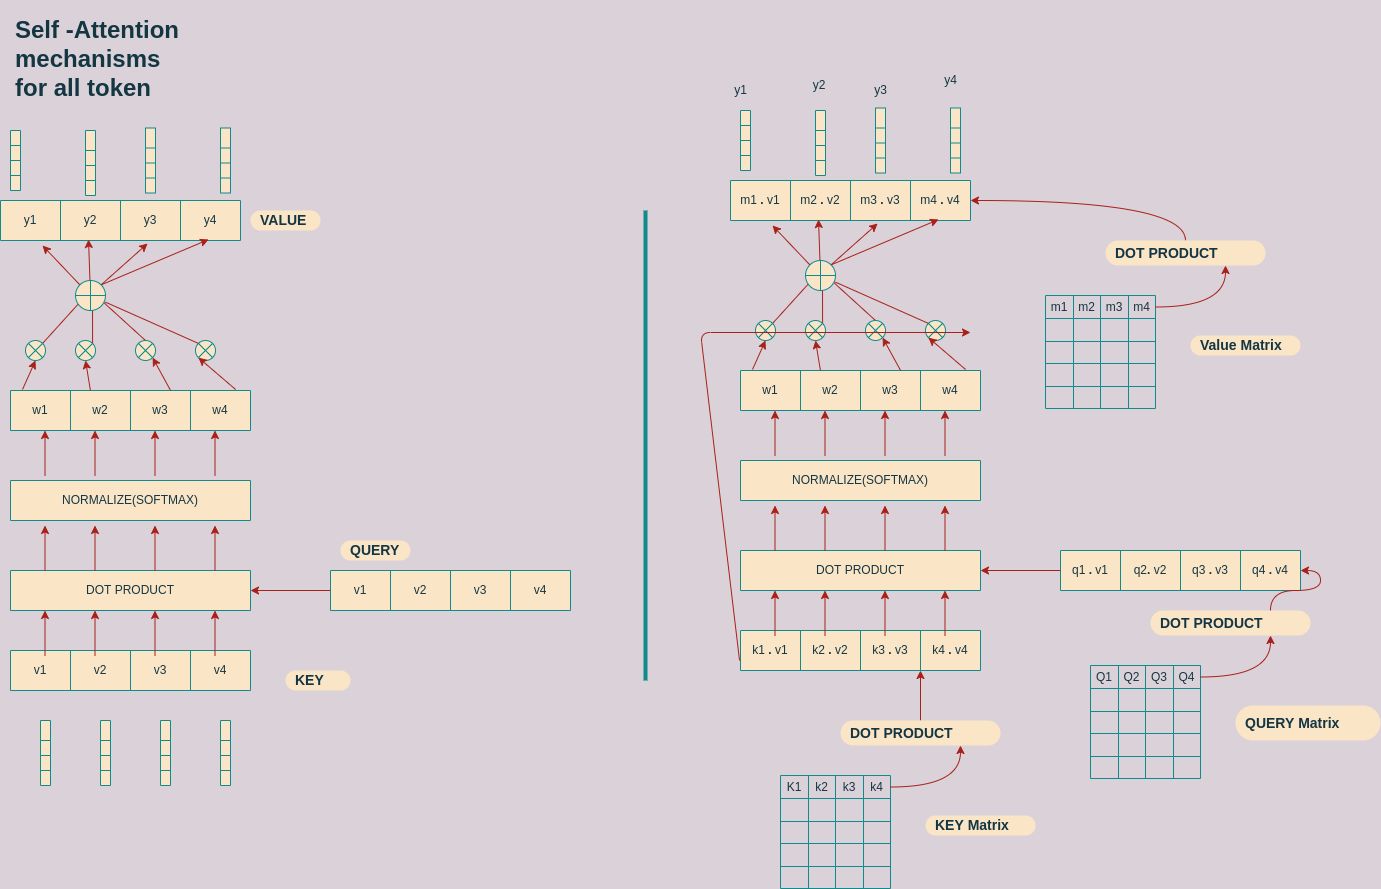

### **What is Multi-Head Self Attnetion**

- Scaled-Dot Product alignment is used in Multi headed attention.
- it run several self-attention mechanisms  in parallel.
- the independent attention outputs are then concatenated and linearly transformed.

### **Why there is a need of Multi-Head Attention?**

- A word in a seuence can have multiple dependency relation to the other word.
- representation of dependency is very much needed to understand syntactic and semantic meaning of sequence.
- Multiple attention heads healps to understand complex relation across the sequence.



### **How to Compute Multi-headed AM?**
1. Randomly intialized wq, wk  and wv MATRIX.
2. Define number of attention head `N`.
3. Compute Query, Value and Key Matrix by taking Dot product of above three Matrix.
4. Split each matrix into `N` matrix of shape  (inp_seq_len, depth) each, where depth is nothing but last dimention of above matrix divide by `N`.
5. For each attention head, Select an energy function and  compute Context vectors
6. Concat the context vector of all attention head.
7. pass it through other linear layer.




---

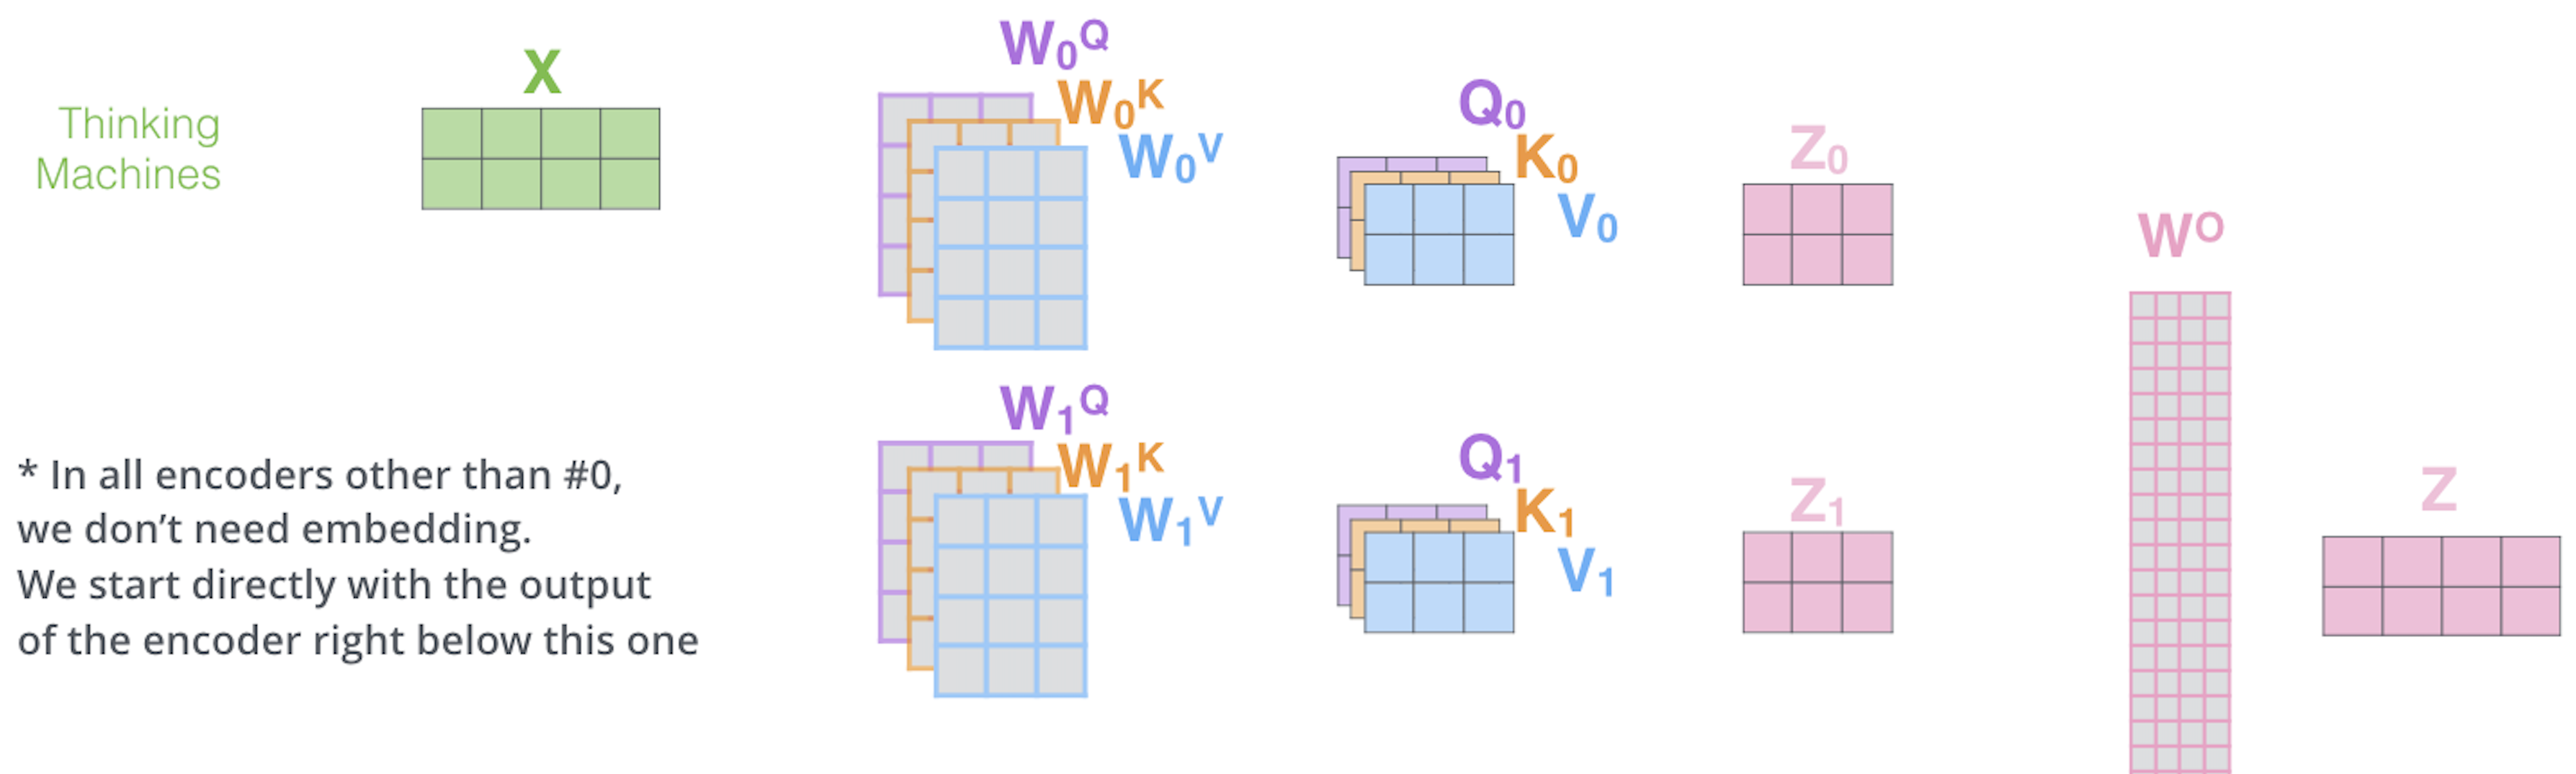

### **Significance of Multi-headed Attention**

In a single self-attention operation, all this information just gets summed together.


*  Multi-head attention helps to learn diverse syntactic relations in a given input sequence. 
*   provides greater power of discrimination, by combining several self attention mechanisms each with different matrices $W_{iq}, W_{iv}, W_{ik}$








## **Below showing attention heatmap of "it" word at different attention head.**



- for simplicity, assume we have two attention head,
- Two attention head shown in below diagram as green and brown heatmap.
- 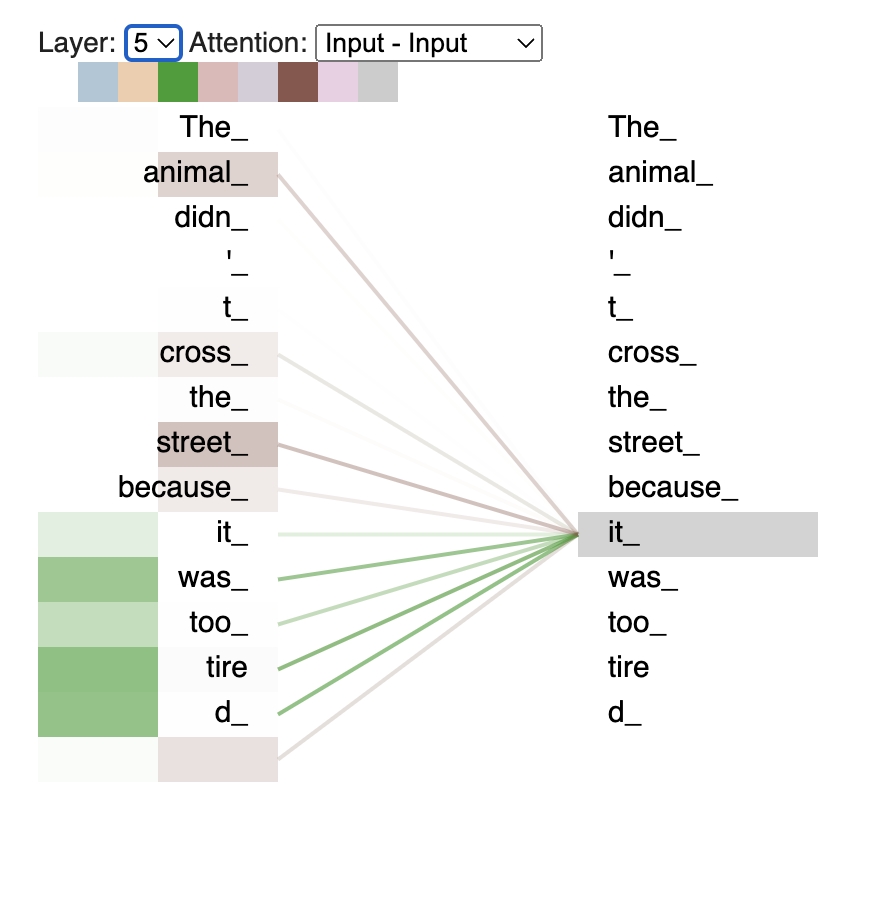

### **What is the input to the encoder?**

-  **INPUT**: Value after Adding the positional encoding to the input embedding. 

### **What is  the architecture of Transformers Encoder?**



- the transformer encoder is a stack of multiple identical layers, where each layer has two sublayers.
- The first is a `multi-head self-attention head`.
- Second is a `positionwise feed-forward network`. 
- *  N=6, identical layers.

### **What is the input to multi-head self-attention layer?**
- In the encoder self-attention, `Queries`, `Keys`, and `Values` are all from the the outputs of the previous encoder layer.
*  The same weight matrix is shared between the two embedding layers (encoder,decoder & pre-softmax o/p layer)






### **What is positionwise Feed-Forward-Network?**

$ffn_x = Relu(W_1 • X+b_1) •W_2 + b_2$

*   Consist of two linear transformations with Rectified Linear Unit (ReLU) activation in between:
*   All 6 Transformer encoder layers apply the same linear transformations to all of the words in the input sequence.


`Furthermore,` each of above two sublayers has a residual connection around it.
1. Each sublayer is also succeeded by a normalization layer, layer-norm(.), 
2. which normalizes the sum computed between the sublayer input, x, and the output generated by the sublayer itself, 

$	Sublayer(x) = layer norm(x + sublayer(x))$




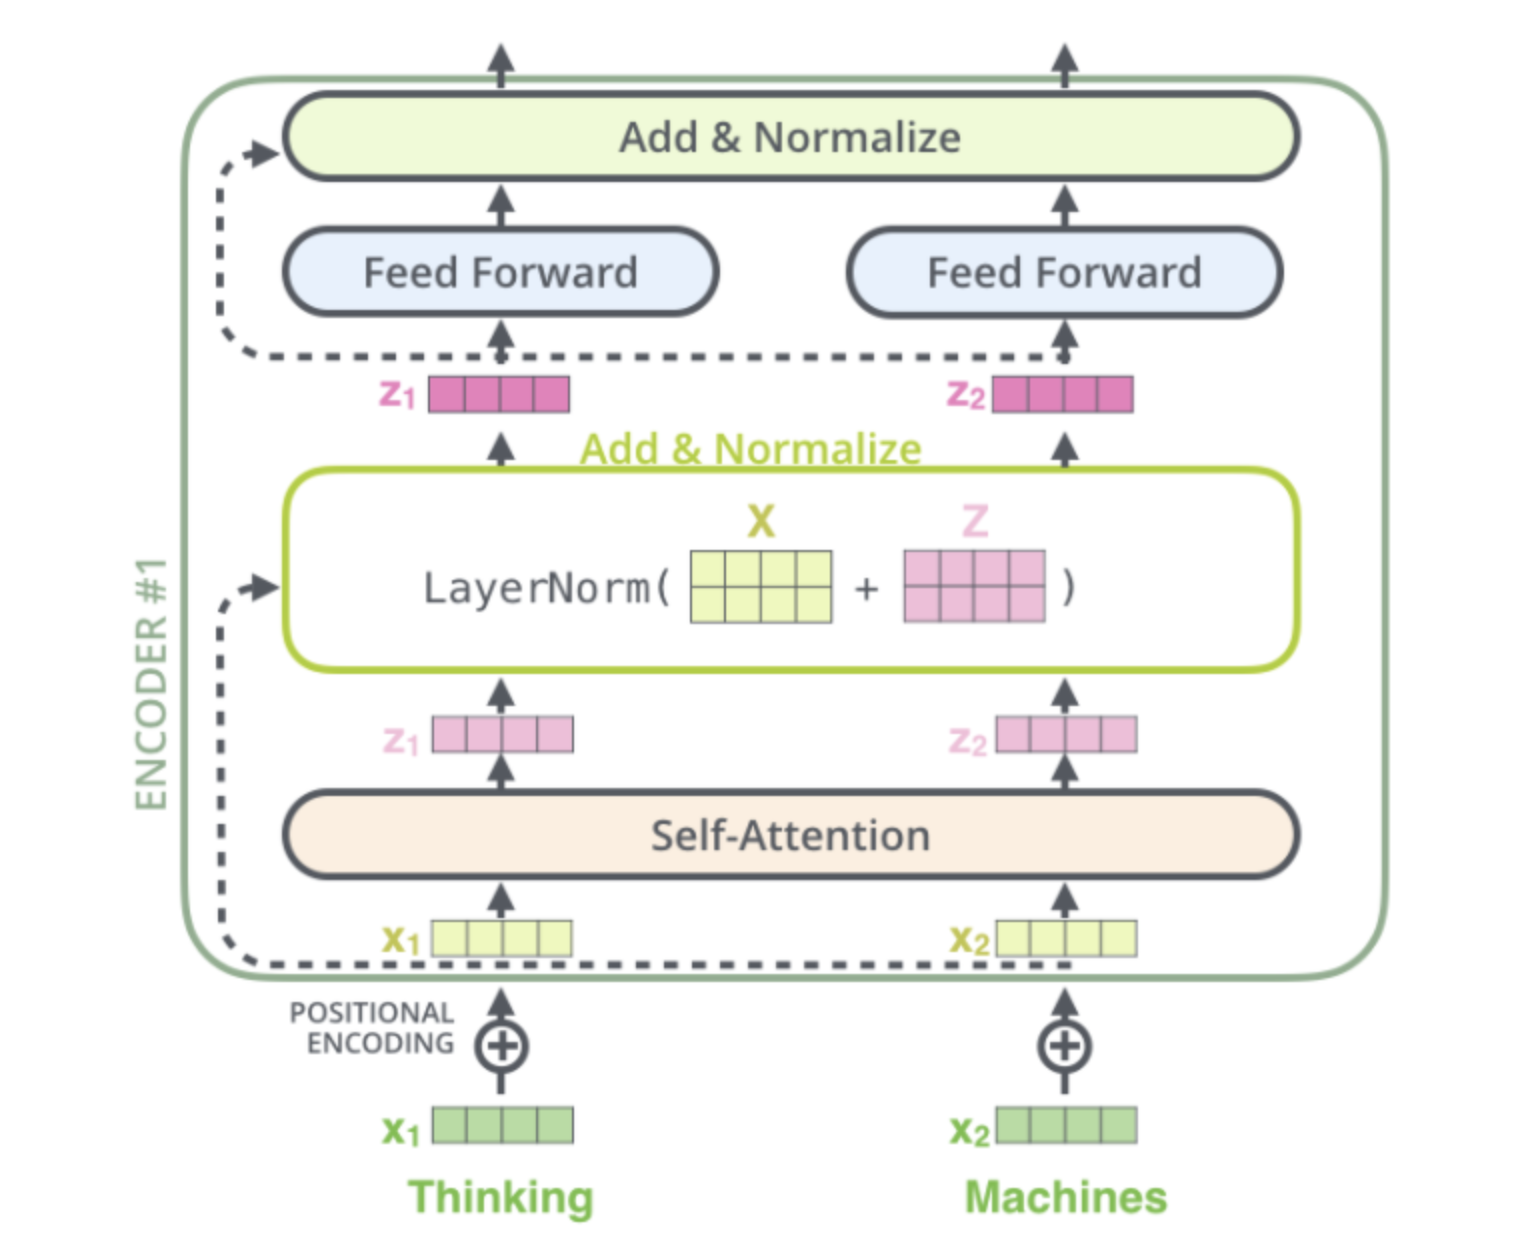

# **Transformer Decoder**


*   The decoder’s job is to generate text sequences. 
*   The decoder has a similar sub-layer as the encoder.
*   Along with Multi-headed attention, it also contains Mask multiheaded attention mechanisms.
*   The decoder is capped off with a linear layer that acts as a classifier, and a softmax to get the word probabilities.


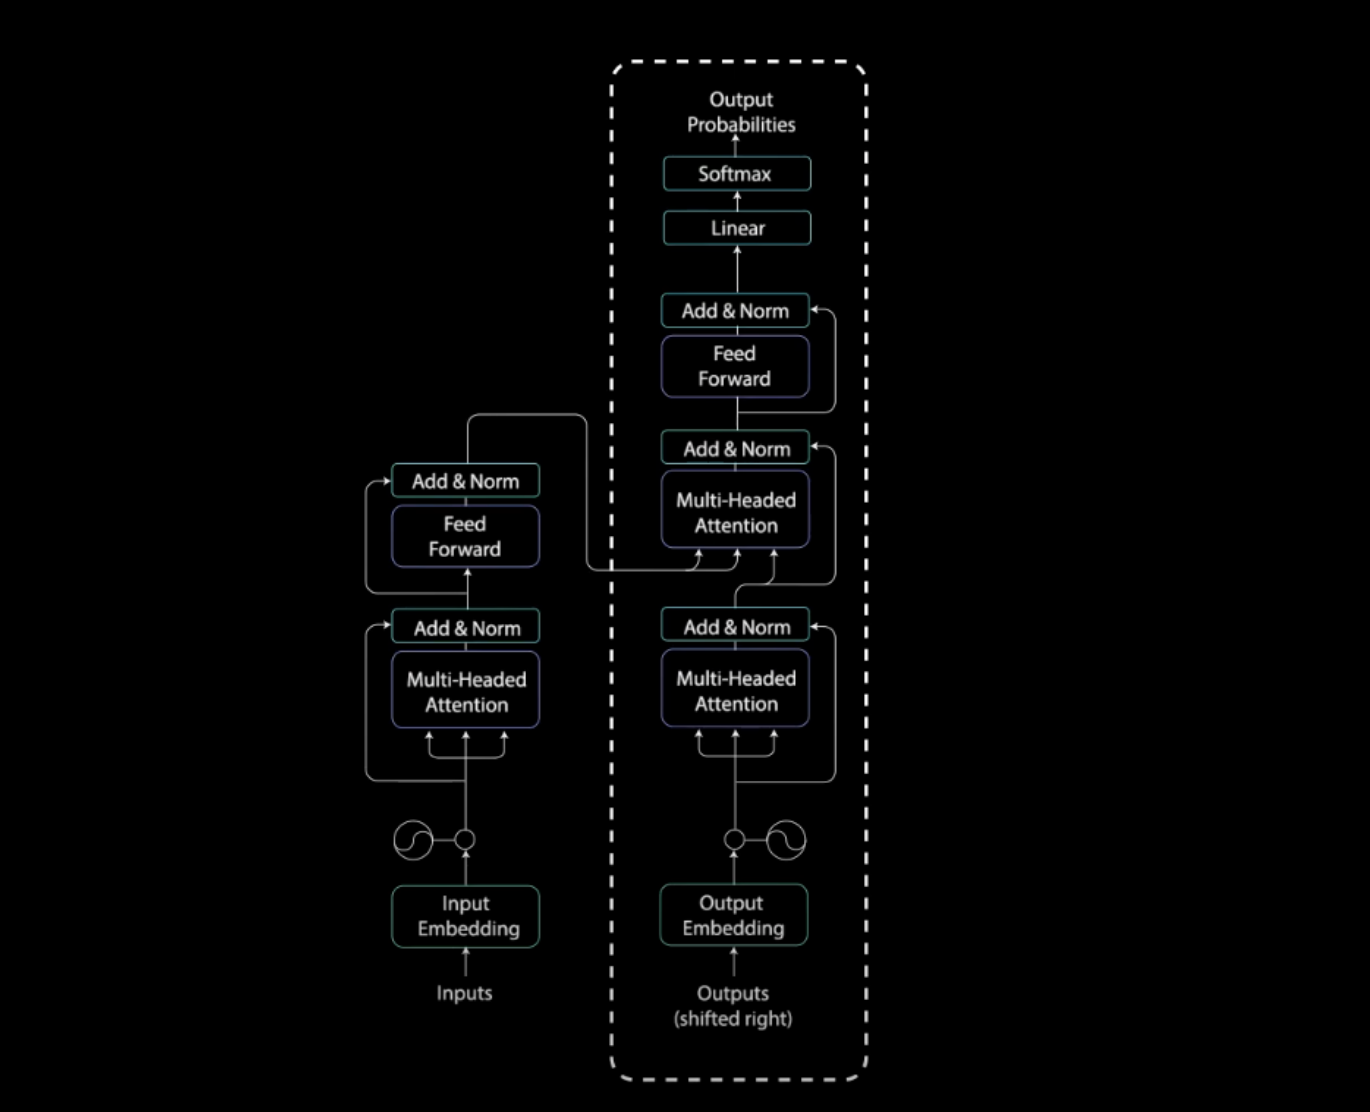




### **What is the Input to the Decoder?**

*  The beginning of the decoder is pretty much the same as the encoder.
- Input Embeddings & Positional Encoding

### **What type of attention is computed in decoder?**
* Masked-Multi-headed self-attention


### **What is Masked Multi-Headed Attention?**

*  This multi-headed attention layer operates slightly differently, contains look ahead mask. 
*  As the decoder is autoregressive and generates the sequence word by word, 
*  Masking method helps to prevent computing attention scores for future words.






### **What is Look-Ahead Mask?**

*  The mask is a matrix that’s the same size as the attention scores filled with values of 0’s and negative infinities.
*  Add the mask to the scaled attention scores, you get a matrix of the scores, with the top right triangle filled with negativity infinities.

*  Take the softmax of the masked scores, the negative infinities get zeroed out, leaving zero attention scores for future tokens.

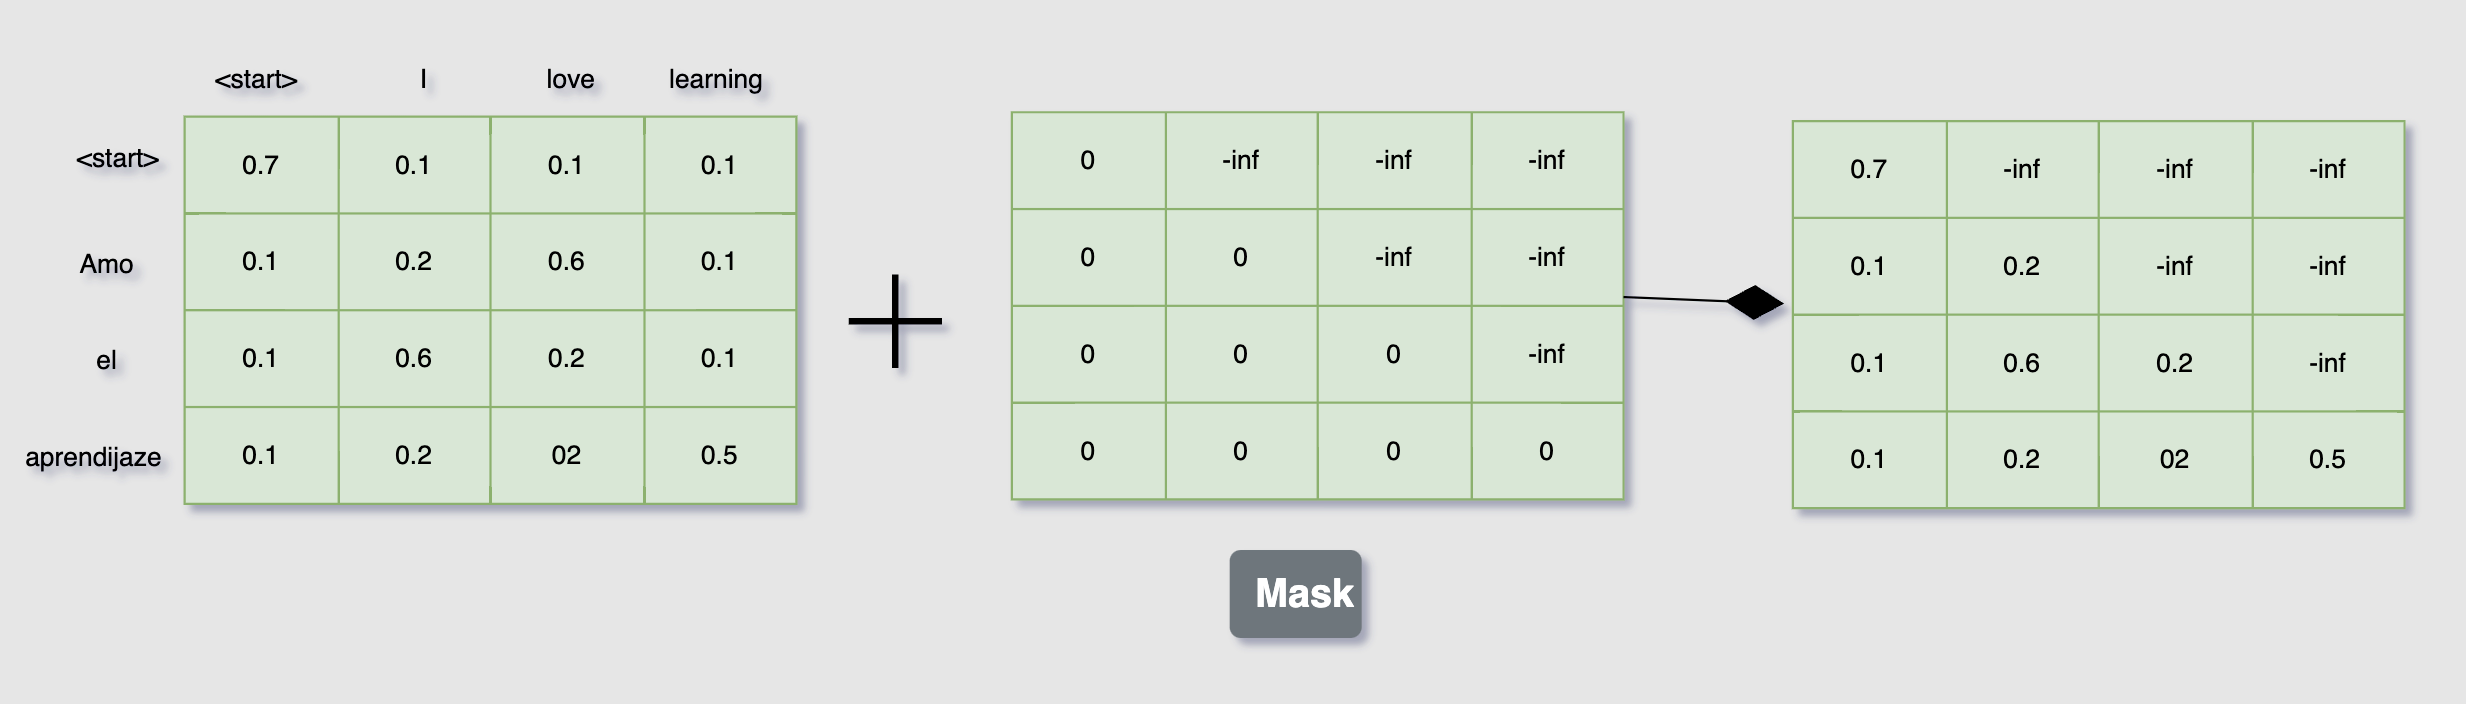


### **How many attention computation blocks is ther in Decoder?**

- Transformers decoder contains `Two` attention computation block.(see above graph)

1. Encoder-Decoder Attention Mechanisms.
2. Decoder Self Attention Mechanisms.

### **What is Encoder-Decoder Attention Mechanisms.**
-  the  computes the interaction between each target word with each input word.
- `Queries` are from the outputs of the previous decoder head, and the 
- `Keys` and `Values` are from the transformer encoder outputs. 


### **What is Decoder Self Attention Mechanisms**
- `Queries`, `Keys`, and `Values` are all from the the outputs of the previous decoder head.

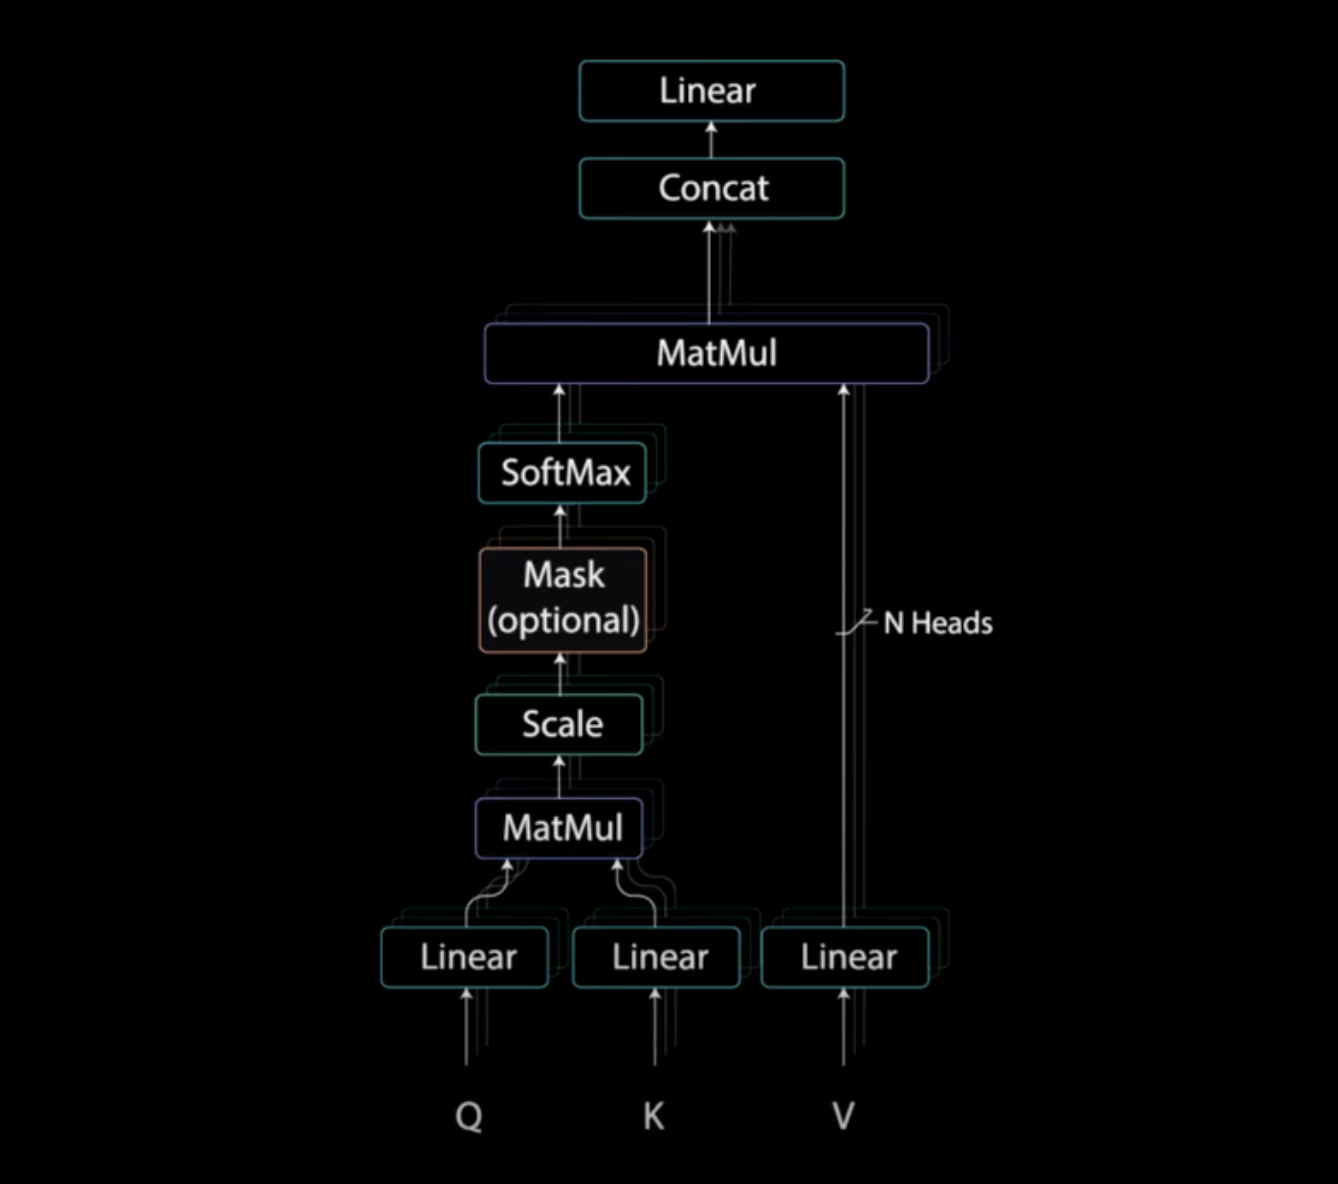


### **Linear Classifier and Final Softmax for Output Probabilities**

*  The output of the final pointwise feedforward layer goes  through a final linear layer that acts as a classifier. 
*  The output of the classifier then gets fed into a softmax layer, which will produce probability scores between 0 and 1.




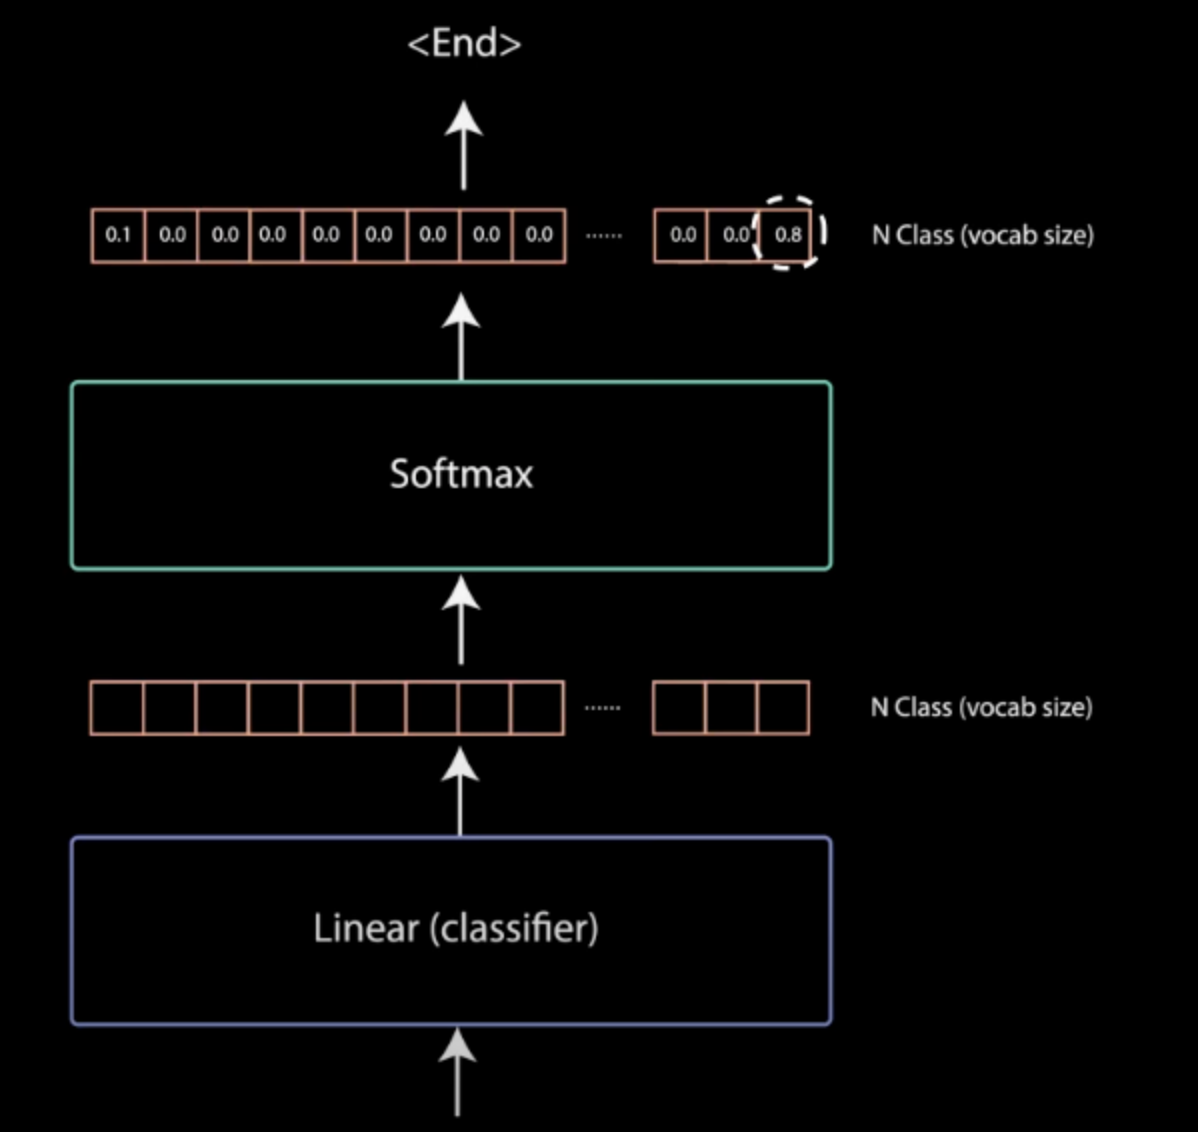

# Can you use this architecture for translation problem?





Lets see  Time Complexity between RNN vs Attention


Architecture  | Time Complexity per Layer | Sequential operations
-------------------|------------------|------------
RNN/LSTM       | $O_(n \cdot d^2)$ | $O(n)$
Attention       | $O(n^2 \cdot d) $ |$O(1)$



- n: is the length of the sequence.
- d: is the dimension of the word representation (512, 1024 in generally)

In terms of computational complexity, 
- when n<d, the attention layers are faster than the recursive layers


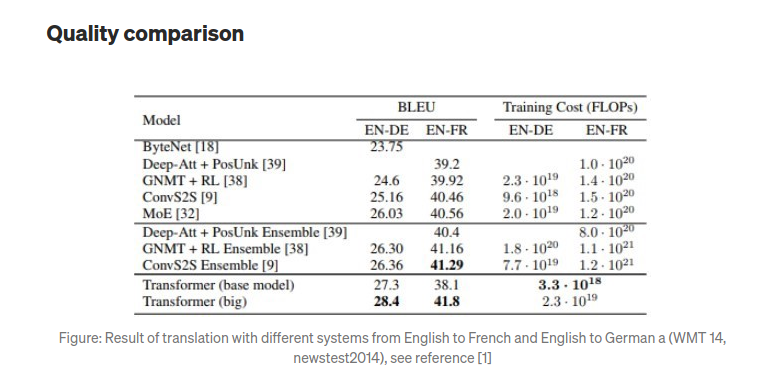

### Conclusion
- Time complexity RNN > Attention
- Sequential operation is constant for Attention
- Transformers is composed of only attention blocks
- So time complexity Transformers < RNN
- And by seeing Quality Score transformers perform better than other translation Architecture





## **How transfromers support Transfer-leraning in NLP?**

- one way is to train a really big language model on
billions of words, transfer to every NLP task!

- Use transfomers architecture to train language model.

- And fine tune the model for various downtream task like translation, summarization , classification etc.



## **How to fine-tune a pre-trained model?**
- Fine-tune a pretrained model with 🤗 `Transformers Trainer`.
- Fine-tune a pretrained model in `TensorFlow with Keras`.
- Fine-tune a pretrained model in `native PyTorch`.




## **Transformers Library**

- Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

**These models can be applied on:**

📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.




## Lets Implements Transformers 

# CODE-IMPLEMENATAION

## Install dependencies

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install -U datasets sacrebleu transformers[sentencepiece] --force install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached datasets-2.6.1-py3-none-any.whl (441 kB)
  Using cached sacrebleu-2.3.1-py3-none-any.whl (118 kB)
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
  Using cached install-1.3.5-py3-none-any.whl (3.2 kB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached multiprocess-0.70.14-py37-none-any.whl (115 kB)
  Using cached importlib_metadata-5.0.0-py3-none-any.whl (21 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached pyarrow-10.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.4 MB)
  Using cached aiohttp-3.8.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (948 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cac

## **Load Dataset**

In [ ]:
from datasets import load_dataset, load_metric
from transformers import pipeline

# Load dataset
raw_datasets = load_dataset("kde4", lang1="en", lang2="fr")

Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

Dataset kde4 downloaded and prepared to /root/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(f"Size of Labelled pair Data   : {raw_datasets['train'].num_rows}")

Size of Labelled pair Data   : 210173


## **Train and test Split**


In [ ]:
split_datasets = raw_datasets["train"].train_test_split(train_size=0.9, seed=20)

#rename the "test" key to "validation"

split_datasets["validation"] = split_datasets.pop("test")


In [ ]:
#let’s take a look at one element of the dataset

split_datasets["train"][10:18:2]["translation"]

[{'en': 'Text Cursor Movement', 'fr': 'Mouvements du curseur de texte'},
 {'en': '2004-09-15 3.10.00', 'fr': '2004-09-15 3.10.00'},
 {'en': 'Reload the namespaces from the server. This overwrites any changes.',
  'fr': 'Recharger les espaces de noms depuis le serveur. Cette action écrasera toutes les modifications effectuées.'},
 {'en': 'Credit Card Tracker', 'fr': 'Traqueur de carte de créditName'}]

In [ ]:
#let’s take a look at one element of the dataset

split_datasets["validation"][10]["translation"]

{'en': 'Read from Valgrind process failed.',
 'fr': 'Impossible de lire depuis le processus Valgrind.'}

## **Load pre-trained Model**

In [ ]:
#Model Name
model_checkpoint = "Helsinki-NLP/opus-mt-en-fr"

#Load Model
translator = pipeline("translation", model=model_checkpoint)

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


## **Lets See translation from pretrained_model**

In [ ]:
tmp_data = split_datasets["train"][172]["translation"]
tmp_translation = translator(tmp_data['en'])

print(f"Original English Text  :  `{tmp_data['en']}`")
print(tmp_translation)
print(f"Original French Text :  `{tmp_data['fr']}`")

Original English Text  :  `Unable to import %1 using the OFX importer plugin. This file is not the correct format.`
[{'translation_text': "Impossible d'importer %1 en utilisant le plugin d'importateur OFX. Ce fichier n'est pas le bon format."}]
Original French Text :  `Impossible d'importer %1 en utilisant le module d'extension d'importation OFX. Ce fichier n'a pas un format correct.`


## **Load Tokenizers**

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, return_tensors="tf")

In [ ]:
print("preprocessing one sample looks like this \n")

en_sentence = split_datasets["train"][1]["translation"]["en"]
fr_sentence = split_datasets["train"][1]["translation"]["fr"]


#as_target_tokenizer() will set the tokenizer in the output language.
inputs = tokenizer(en_sentence)
with tokenizer.as_target_tokenizer():
    targets = tokenizer(fr_sentence)


wrong_targets = tokenizer(fr_sentence)
print(tokenizer.convert_ids_to_tokens(wrong_targets["input_ids"]))
print(tokenizer.convert_ids_to_tokens(targets["input_ids"]))

preprocessing one sample looks like this 

['▁Par', '▁dé', 'f', 'aut', ',', '▁dé', 've', 'lop', 'per', '▁les', '▁fil', 's', '▁de', '▁discussion', '</s>']
['▁Par', '▁défaut', ',', '▁développer', '▁les', '▁fils', '▁de', '▁discussion', '</s>']


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:3547: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  "`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your "


## **Preprocessing**
- formatting data which transformers library understand.

In [ ]:
max_input_length = 128
max_target_length = 128


def preprocess_function(examples):
    inputs = [ex["en"] for ex in examples["translation"]]
    targets = [ex["fr"] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Set up the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
split_datasets["train"].column_names

['id', 'translation']

In [ ]:
tokenized_datasets = split_datasets.map(
    preprocess_function,
    batched=True,
    remove_columns=split_datasets["train"].column_names,
)

  0%|          | 0/190 [00:00<?, ?ba/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

## **Model Initliazation**

- `DataCollatorForSeq2Seq` pads following to the maximum length encountered in the labels.:
  - Input IDs, 
  - attention mask,  
  - decoder_input_ids, 
  - labels 
  


In [ ]:
from transformers import DataCollatorForSeq2Seq
from transformers import TFAutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint, from_pt=True)

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

All PyTorch model weights were used when initializing TFMarianMTModel.

All the weights of TFMarianMTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


In [ ]:
# Lets see content of data_collator

batch = data_collator([tokenized_datasets["train"][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [ ]:
# Lsts see how decoder input is mapped to id
batch["decoder_input_ids"]

<tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[59513,   577,  5891,     2,  3184,    16,  2542,     5,  1710,
            0, 59513, 59513, 59513, 59513, 59513, 59513],
       [59513,  1211,     3,    49,  9409,  1211,     3, 29140,   817,
         3124,   817,   550,  7032,  5821,  7907, 12649]], dtype=int32)>

In [ ]:
tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    collate_fn=data_collator,
    shuffle=True,
    batch_size=32,
)
tf_eval_dataset = tokenized_datasets["validation"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    collate_fn=data_collator,
    shuffle=False,
    batch_size=16,
)

## **Model Compilation**
- Define optimizer
- learning rate
- number of epochs


In [ ]:
from transformers import create_optimizer
import tensorflow as tf

# The number of training steps is the number of samples in the dataset, divided by the batch size then multiplied
# by the total number of epochs. Note that the tf_train_dataset here is a batched tf.data.Dataset,
# not the original Hugging Face Dataset, so its len() is already num_samples // batch_size.
num_epochs = 3
num_train_steps = len(tf_train_dataset) * num_epochs

optimizer, schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


## **Model Training**

In [ ]:
model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    epochs=num_epochs,
)
model.save_pretrained('/content/drive/MyDrive/scalar-en-to-fr')

NameError: ignored

## **Model Inferencing**

In [ ]:

model = TFAutoModelForSeq2SeqLM.from_pretrained('/content/drive/MyDrive/scalar-en-to-fr')

pipe = pipeline(task='translation',  # replace with whatever task you have
                model=model,
                tokenizer=tokenizer)


In [ ]:
pipe('Unable to import %1 using the OFX importer plugin. This file is not the correct format.')

[{'translation_text': "Impossible d'importer %1 en utilisant le module externe OFX d'importation. Ce fichier n'est pas le format correct."}]

## **How to measure Translation quality?**

### **BLUE Score**

- BLEU is a metric to quantify effectiveness of an Machine Translation (MT). 
- It stands for BiLingual Evaluation Understudy 
- It solves the problem of different human translation references by different annotators when comparing to machine generated translation.

In [ ]:
from datasets import load_metric

metric = load_metric("sacrebleu")

In [ ]:
import numpy as np
def compute_metrics(model):
    all_preds = []
    all_labels = []

    # Genearte sample dataset into tf_datset format from validation data
    sampled_dataset = tokenized_datasets["validation"].shuffle().select(range(200))
    tf_generate_dataset = sampled_dataset.to_tf_dataset(
        columns=["input_ids", "attention_mask", "labels"],
        collate_fn=data_collator,
        shuffle=False,
        batch_size=4,
    )

    #Generate traslation
    for batch in tf_generate_dataset:

        # predictions
        predictions = model.generate(
            input_ids=batch["input_ids"], attention_mask=batch["attention_mask"]
        )
 
        decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
        labels = batch["labels"].numpy()

        # removing padding pad_id = -100
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
        
        # Ids To text
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        decoded_preds = [pred.strip() for pred in decoded_preds]
        decoded_labels = [[label.strip()] for label in decoded_labels]
        all_preds.extend(decoded_preds)
        all_labels.extend(decoded_labels)

    result = metric.compute(predictions=all_preds, references=all_labels)
    return {"bleu": result["score"]}

In [ ]:
print(compute_metrics(model))

{'bleu': 54.038605555850275}


# **Transformer Architecture Application**



*   Language Modelling(only encoder part is used)(BERT)
*   All Seq2Seq Task like:
      1.   Language Translation
      2.   QnA
      3.   Summarization

## **[PROBLEM] Get Gist from News Agency Interviews.**

*   You are a data scientist working in Intenation News Agency company.
*   And News Agency generally interview lot of people like politicians, bussinessman, lawyers and sportsman.
*   Since, thousands of interview happen daily across the globe
*   you have the job to get gist from each interview transcript.






## Code Implemenation



*   Load pretrained-model using Transformers
*   Get the gist of your input



In [ ]:
#pip install transformers

In [ ]:

from transformers import pipeline

summarizer = pipeline("summarization", model="lidiya/bart-large-xsum-samsum")
conversation = '''
TIME: I wanted to begin in the news. Iran overnight said it was considering enriching uranium at 
      levels that would violate the 2015 nuclear agreement.
      You’ve been very clear that you won’t let Iran get a nuclear weapon.

TRUMP: Yeah, I think they’d be making a big mistake doing that.

TIME: Are you considering more military action?

TRUMP: I wouldn’t say that. I can’t say that at all. It would be inappropriate. But they would be making a big mistake if they enriched.

TIME: Are they calling your bluff on this or how do you see it?

TRUMP: Time will tell. Only time will tell.

TIME: I mean in your campaign, you promised to get the U.S. out of unnecessary foreign wars. With your —

TRUMP: That’s true. Well I have.                                       
'''
summarizer(conversation)[0]['summary_text']

"Iran is considering enriching uranium at levels that would violate the 2015 nuclear agreement. Donald Trump says it would be a big mistake for Iran to enrich uranium, but he's not considering military action."